In [76]:
import math
import pandas as pd

def fractionated_interest(i,m):
    ir = m *((1+i)**(1/m)-1)
    return ir

def summarized_interest(i,m):
    ir = (1+i/m)**m - 1
    return ir

def continous_interest(i,t):
    cont = 2.7182818**(math.log(1+i)*t)
    return cont

def continous_discounting(i,n,t):
    cont = 2.7182818**(-math.log(1+i)*(n-t))
    return cont

def presentvalue_c(c,i,t):
    pv = c * (1+i)**t
    return pv

def presentvalue_b(b,i,t):
    pv = b*(1/(1+i))**t
    return pv

#time value of c
def time_value_c(c,b,i):
    m = 0
    M = 0
    for j in range(0,len(c)):
        m = (c[j] - b[j])*(1+i[j])
        M = M+m
    return(M)

#time value of v
def time_value_v(c,b,i):
    m = 0
    M = 0
    for j in range(0,len(c)):
        m = (c[j] - b[j])*1/(1+i[j])
        M = M+m
    return(M)

#essentially difference between timevalues
def fair_stream(c,b,i,n):
    t = len(c)
    n = t
    U = 0
    V = 0
    for j in range(0,n):
        U = U + (c[j] - b[j])*(1+i[j])**(t-j)
        V = V + (b[j] - c[j])*(1+i[j])**(-(t+1-t))
    return(U+V)


def yrlygrowth(total_growth, years):
    """
    Determine the annual growth from the growth over an
    arbitrary time span.
    """
    return math.exp(math.log(total_growth) / years)

def pvannuity(option = "annual", rate = 1, nrmts = 1, amt=1):
    if option == "annual":
        amt * (1. - (1. + rate)**-nrmts) / rate
        
    elif option == "semi-annual":
        amt * (1. - (1. + rate)**-nrmts) / rate
        
    elif option == "quarter":
        amt * (1. - (1. + rate)**-nrmts) / rate
        
    return amt * (1. - (1. + rate)**-nrmts) / rate

def loanpayment(amount, Interest_rate, nr_payments):
    return float(amount) / pvannuity(Interest_rate, nr_payments)


def inst_to_ann(r):
    """
    Convert an instantaneous interest rate to an annual interest rate
    """
    return np.expm1(r)

def ann_to_inst(r):
    """
    Convert an instantaneous interest rate to an annual interest rate
    """
    return np.log1p(r)

# Define the interest rate simulation based on the CIR model
def cir(n_years = 10, n_scenarios=1, a=0.05, b=0.03, sigma=0.05, steps_per_year=12, r_0=None):
    """
    Generate random interest rate evolution over time using the CIR model
    b and r_0 are assumed to be annualized rates
    output values are annualized rates as well
    """
    if r_0 is None: r_0 = b 
    r_0 = ann_to_inst(r_0)
    dt = 1 / steps_per_year
    num_steps = int(n_years * steps_per_year) + 1 # because n_years might be a float
    
    shock = np.random.normal(0, scale=np.sqrt(dt), size=(num_steps, n_scenarios))
    rates = np.empty_like(shock)
    rates[0] = r_0
    for step in range(1, num_steps):
        r_t = rates[step-1]
        d_r_t = a*(b-r_t)*dt + sigma*np.sqrt(r_t)*shock[step]
        rates[step] = abs(r_t + d_r_t) # just in case of roundoff errors going negative
        
    return pd.DataFrame(data=inst_to_ann(rates), index=range(num_steps))


def annuity_in_arrear(v0, t, i):
    res = (1-(1/(1+i))**t)/i
    return res

def annuity_due(v0,t,i):
    res = (1-(1/(1+i))**t)/(1-(1/(1+i)))
    return res

# needs correcting
def deferred_annuity_in_arrear(v0, t, k, i):
    if t < k:
        (1/(1+i))**k * annuity_in_arrear(v0,k,i)
    elif t >= k:
        annuity_in_arrear(v0,t,i) - annuity_in_arrear(v0, k ,i)
        
def deferred_annuity_due(v0,t,k,i):
    if t < k:
        (1/(1+i))**k * annuity_in_due(v0,k,i)
    elif t >= k:
        annuity_in_arrear(v0,t,i) - annuity_in_due(v0, k ,i)
        
def cont_a(i,n):
    a = (1 - cont_dis(i,n,0))/math.log(1+i)
    return a

def cont_def_a(i,n,k):
    a_n = (1 - cont_dis(i,n,0))/math.log(1+i)
    a_k = (1 - cont_dis(i,k,0))/math.log(1+i)
    return a_n - a_k

In [ ]:
def BinomialCoefficient(N,k):
    a = math.factorial(N)
    b = math.factorial(N-k)
    c = math.factorial(k)
    return a/(b*c)

def PoissonDensity(lam,k):
    """
    """
    a = np.exp(-lam)
    b = np.power(lam,k)
    c = math.factorial(k)
    f = np.divide(a*b,c)
    return f

def binomialDensity(N,p,k):
    """
    """
    a = p**k
    b = (1-p)**(N-k)
    f =  BinomialCoefficient(N,k)*a*b
    return f  

In [70]:

def PoissonDensity(lam,k):
    a = np.exp(-lam)
    b = np.power(lam,k)
    c = math.factorial(k)
    f = a*b/c
    return f

def LogitDensity(z,mu,sigma):
    num = np.log(z/(1-z))-mu    
    den = 2*(sigma**2)
    K = np.reciprocal(sigma*np.sqrt(2*math.pi)*z*(1-z))
    f = K*np.exp(-np.divide(num**2,den))
    return f

def ProbitDensity(z,mu,sigma):
    pzInverse = np.divide(norm.ppf(z)-mu,sigma)
    num = gaussianDensity(pzInverse,0,1)
    den = sigma*gaussianDensity(norm.ppf(z),0,1)
    f = np.divide(num,den)
    return f

def GaussianDensity(z,mu,sigma):
    num = z-mu    
    den = 2*(sigma**2)
    K = np.reciprocal(np.sqrt(2*math.pi)*sigma)
    f = K*np.exp(-np.divide(num**2,den))
    return f        

#def logGaussianDensity(z,mu,sigma):
#    num = np.log(z)-mu    
#    den = 2*(sigma**2)
#    K = np.reciprocal(np.multiply(np.sqrt(2*math.pi)*sigma,z))
#    f = K*np.exp(-np.divide(num**2,den))
#    return f        

def tDensity(z,mu,sigma,nu):
    g1 = math.gamma((nu+1)/2)
    g2 = math.gamma(nu/2)
    K = np.divide(g1,g2*np.sqrt(nu*math.pi)*sigma)
    power = np.divide((z-mu)**2,nu*(sigma**2))
    f = K*np.power(1+power,-(nu+1)/2)
    return f       

def chi2Density(z,nu):
    g1 = math.gamma(nu/2)
    constant = np.multiply(g1,2**(nu/2))
    term1 = np.power(z,(nu/2)-1)
    term2 = np.exp(-z/2)   
    f = np.reciprocal(constant)*term1*term2
    return f       

def gigDensity(x,myA):
    constant = np.divide(1,2*scipy.special.kn(1, myA))
    f = constant*np.exp(-0.5*myA*(x+1/x))
    return f

def betaDensity(z,a,b):
    term1 = np.power(z,a-1)
    term2 = np.power(1-z,b-1)   
    f = np.reciprocal(computeBeta(a,b))*term1*term2
    return f           

def asrfDensity(x,p,rho):
    a = np.sqrt(np.divide(1-rho,rho))
    b = np.power(np.sqrt(1-rho)*norm.ppf(x)-norm.ppf(p),2)
    c = 0.5*(np.power(norm.ppf(x),2) - b/rho)
    return a*np.exp(c)

def poissonDensity(lam,k):
    a = np.exp(-lam)
    b = np.power(lam,k)
    c = math.factorial(k)
    pmf = np.divide(a*b,c)
    return pmf

def binomialDensity(N,p,k):
    a = p**k
    b = (1-p)**(N-k)
    f =  BinomialCoefficient(N,k)*a*b
    return f            

def gammaDensity(z,a,b):
    constant = np.divide(b**a,math.gamma(a))
    t1 = np.exp(-b*z)
    t2 = np.power(z,a-1)
    pdf =  constant*t1*t2
    return pdf            

def logNormalDensity(z,mu,sigma):
    constant = np.divide(1,z*sigma*np.sqrt(2*math.pi))
    num = -(np.log(z)-mu)**2
    den = 2*sigma**2
    pdf =  constant*np.exp(num/den)
    return pdf   

#def weibullDensity1(z,a,b):
#    constant = np.divide(a,b**a)
#    t1 = np.power(z/b,a-1)
#    t2 = np.exp(-(z/b)**a)
#    pdf =  constant*t1*t2
#    return pdf   

def weibullDensity(x,a,b):
     return (a/b)*(x/b)**(a-1)*np.exp(-(x/b)**a)

In [71]:
def fOrnUhlenSol(t,x,a,s):
    #probability density for Ornstein-Uhlenbeck
    #t is at time t, x is state x, a is the return to long term mean, s is the spread
    #https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process Fokker-planck equation representation
    
    D = s**2/2
    return np.sqrt(a/(2*np.pi*D*(1-np.exp(-2*a*t)))) * np.exp(-0.5*a/D * (x-x0*np.exp(-a*t))**2 / (1-np.exp(-2*a*t)) )

def fOrnUhlenSol_ss(x,a,s):
    #dunno
    return np.sqrt(a/np.pi/s**2) * np.exp(-a*x**2/s**2)

def fWienerSol(t,x):
    #Probability density for Wiener process
    return 1/sqrt(2*pi*t) * exp(-0.5*x**2/t)

3.0

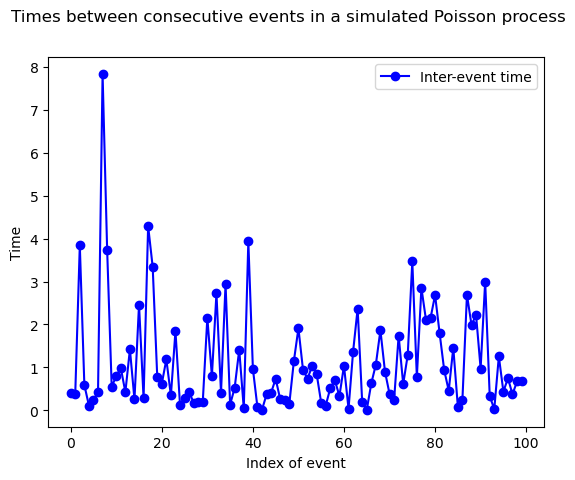

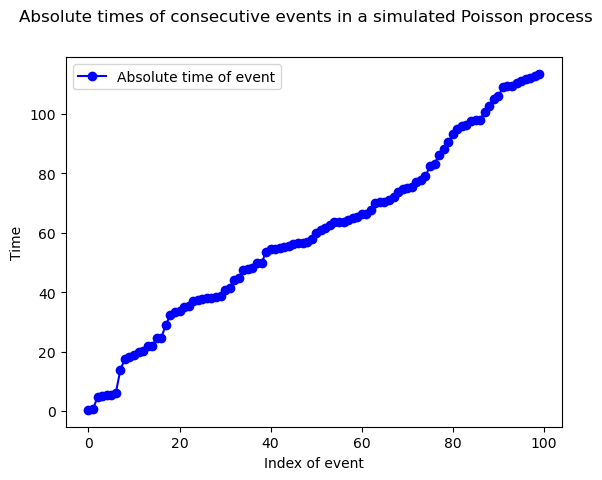

INTERVAL_NUM,NUM_EVENTS


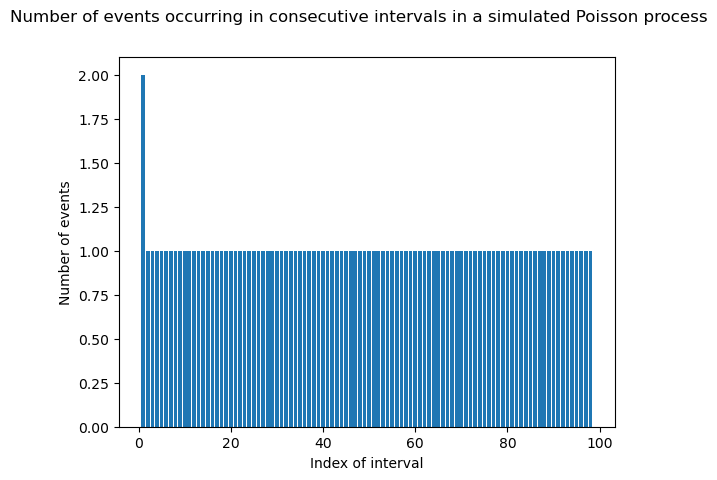

In [16]:
import random
import math
import matplotlib.pyplot as plt

_lambda = 1
_num_events = 100
_event_num = []
_inter_event_times = []
_event_times = []
_event_time = 0

#print('EVENT_NUM,INTER_EVENT_T,EVENT_T')

for i in range(_num_events):
	_event_num.append(i)
	#Get a random probability value from the uniform distribution's PDF
	n = random.random()

	#Generate the inter-event time from the exponential distribution's CDF using the Inverse-CDF technique
	_inter_event_time = (-math.log(1.0 - n) / _lambda)
	_inter_event_times.append(_inter_event_time)

	#Add the inter-event time to the running sum to get the next absolute event time
	_event_time = _event_time + _inter_event_time
	_event_times.append(_event_time)

	#print it all out
	#print(str(i) +',' + str(_inter_event_time) + ',' + str(_event_time))

#plot the inter-event times
fig = plt.figure()
fig.suptitle('Times between consecutive events in a simulated Poisson process')
plot, = plt.plot(_event_num, _inter_event_times, 'bo-', label='Inter-event time')
plt.legend(handles=[plot])
plt.xlabel('Index of event')
plt.ylabel('Time')
plt.show()


#plot the absolute event times
fig = plt.figure()
fig.suptitle('Absolute times of consecutive events in a simulated Poisson process')
plot, = plt.plot(_event_num, _event_times, 'bo-', label='Absolute time of event')
plt.legend(handles=[plot])
plt.xlabel('Index of event')
plt.ylabel('Time')
plt.show()

_interval_nums = []
_num_events_in_interval = []
_interval_num = 1
_num_events = 0

print('INTERVAL_NUM,NUM_EVENTS')

for i in range(len(_event_times)):
	_event_time = _event_times[i]
	if _event_time <= _interval_num:
		_num_events += 1
	else:
		_interval_nums.append(_interval_num)
		_num_events_in_interval.append(_num_events)

		#print(str(_interval_num) +',' + str(_num_events))

		_interval_num += 1

		_num_events = 1

#print the mean number of events per unit time
#print(statistics.mean(_num_events_in_interval))

#plot the number of events in consecutive intervals
fig = plt.figure()
fig.suptitle('Number of events occurring in consecutive intervals in a simulated Poisson process')
plt.bar(_interval_nums, _num_events_in_interval)
plt.xlabel('Index of interval')
plt.ylabel('Number of events')
plt.show()

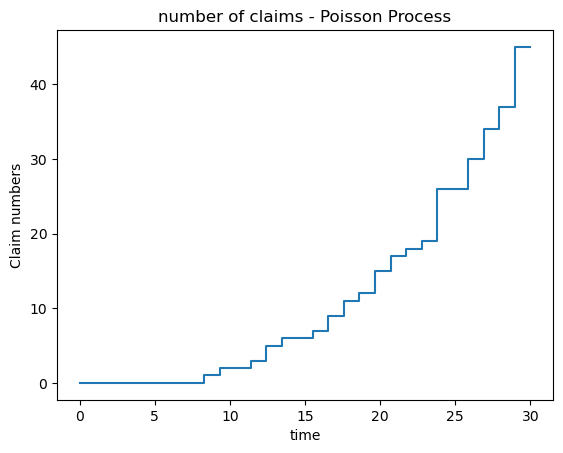

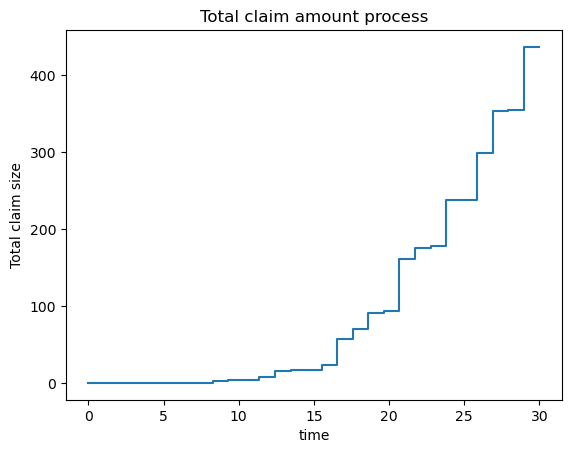

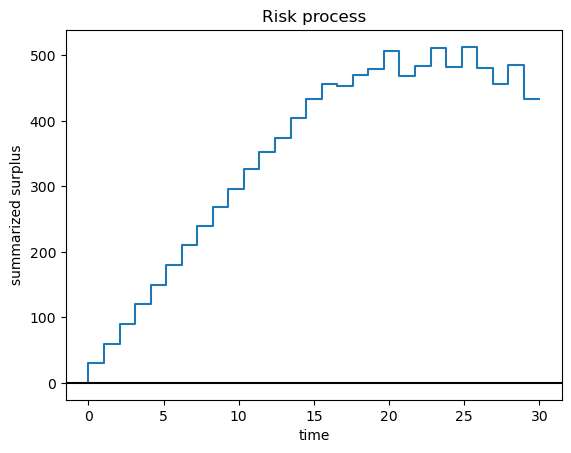

94.58408110515545 mean calculated with first method 112.39297093473661 mean calculated with second method
16381.472222100365 variance calculated with first method 16806.895100517955 variance calculated with second method


In [18]:
import pandas as pd

S = pd.DataFrame()
NT = pd.DataFrame()
N = pd.DataFrame()
X = pd.DataFrame()
U = pd.DataFrame()
lambdas = pd.DataFrame()
tn = 30
c = 30
N = np.zeros((tn, 1))
S = np.zeros((tn, 1))
U = np.zeros((tn, 1))




U[0] = 0
for t in range(1, tn, 1):
            lambdas[0] = 0
            if t>0:
                lambdas[t] = [(t/15)**2]
            
            NT[t] = np.random.poisson(lambdas[t], size=1)
            N[t] = N[t-1] + NT[t]
            X = np.linspace(0, tn, tn)
            
            
            X1 =  np.random.exponential(10)
            S[t] = S[t-1] + NT[t] * X1
            
            U[t] = U[0] + c*t - S[t]
            T1 = np.linspace(0, tn, tn)
            if U[t] <0:
                print("risk has a occured at ", t)
            

plt.step(X, N, label="Lambda = 1")
plt.title('number of claims - Poisson Process')
plt.xlabel('time')
plt.ylabel('Claim numbers')            
plt.show()

plt.title('Total claim amount process')
plt.xlabel('time')
plt.ylabel('Total claim size')            
plt.step(X,S)
plt.show()

plt.step(T1,U)
plt.title('Risk process')
plt.xlabel('time')
plt.ylabel('summarized surplus')   
plt.axhline(y=0, xmin=0, xmax=30, color='black' )
plt.show()

Smean1 = np.mean(S)
Smean2 = np.mean(X1) * np.mean(N)

Svar1 = np.std(S)**2
Svar2 = (np.mean(N) * np.std(X1)**2) + ( np.std(N)**2 * np.mean(X1)**2)

print(Smean1, "mean calculated with first method", Smean2, "mean calculated with second method")
print(Svar1, "variance calculated with first method", Svar2, "variance calculated with second method")



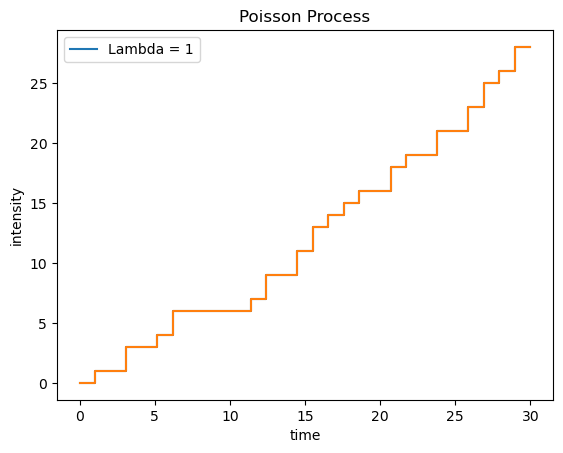

Text(0, 0.5, 'index level')

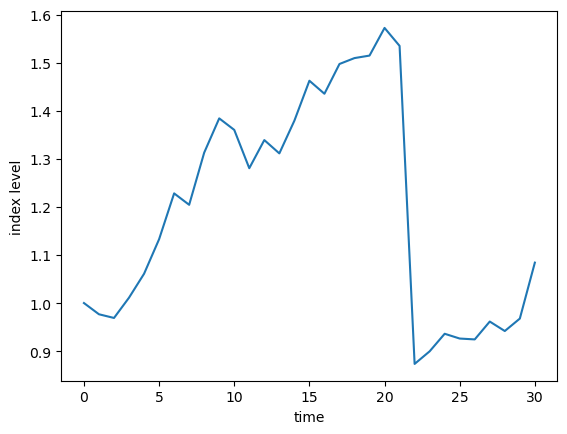

In [21]:
import numpy.random as npr

lambdas = 1
number = 1 
runs = 1
timeframe = 30
iterations = 10000
x0 = 1
dt = 1.0 / timeframe
def poisson_process(lambdas, timeframe):
            X_T = np.random.poisson(lambdas, size=timeframe)
            S = [np.sum(X_T[0:i]) for i in range(timeframe)]
            X = np.linspace(0, timeframe, timeframe)
            graphs = [plt.step(X, S, label="Lambda = %d"%lambdas)[0] for i in range(lambdas)]
            graph = plt.step(X, S, label="Lambda = %d"%lambdas)
            plt.legend(handles=graphs, loc=2)
            plt.title('Poisson Process')
            plt.xlabel('time')
            plt.ylabel('intensity')
poisson_process(lambdas, timeframe)
plt.show()

##################################################################################################
r = 0.05
sigma = 0.2
lamb = 0.75
mu = -0.6
delta = 0.25
rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
S = np.zeros((timeframe + 1, iterations))
S[0] = x0
sn1 = npr.standard_normal((timeframe + 1, iterations))
sn2 = npr.standard_normal((timeframe + 1, iterations))
poi = npr.poisson(lamb * dt, (timeframe + 1, iterations))
for t in range(1, timeframe + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * sn1[t]) + (np.exp(mu + delta * sn2[t]) - 1) * poi[t])
    S[t] = np.maximum(S[t], 0)
plt.plot(S[:, :runs], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')



In [26]:
def Stochastic_process(method, runs, timeframe, increment=None, iterations=None, x0=None):
    r = 0.5
    sigma = 0.3
    theta = 0.2
    kappa = -1.5
    rho = 0.5
    if increment is None:
        increment = 1.0
    else:
        increment = increment
    dt = increment / timeframe
    if runs <= 3 and timeframe <= 20:
        np.random.seed(275)
    elif runs <= 3 and timeframe >= 21 and timeframe <= 50:
        np.random.seed(1023)
    elif runs <= 3 and timeframe >= 51 and timeframe <= 100:
        np.random.seed(31253)
    elif runs <= 3 and timeframe >= 101:
        np.random.seed(789)       
    elif runs >= 4 and runs <= 6 and timeframe <= 20:
        np.random.seed(95)
    elif runs >= 4 and runs <= 6 and timeframe >= 21 and timeframe <=50:
        np.random.seed(320948)
    elif runs >= 4 and runs <= 6 and timeframe >= 51 and timeframe <=100:
        np.random.seed(658)
    elif runs >= 4 and runs <= 6 and timeframe >= 101:
        np.random.seed(34)
    elif runs >= 7 and runs <= 10 and timeframe <= 20:
        np.random.seed(2)
    elif runs >= 7 and runs <= 10 and timeframe >= 21 and timeframe <=50:
        np.random.seed(8)
    elif runs >= 7 and runs <= 10 and timeframe >= 51 and timeframe <=100:
        np.random.seed(101)
    elif runs >= 7 and runs <= 10 and timeframe >= 101:
        np.random.seed(582)      
    elif runs >= 11 and runs <= 16 and timeframe <= 20:
        np.random.seed(2)
    elif runs >= 11 and runs <= 16 and timeframe >= 21 and timeframe <=50:
        np.random.seed(8)
    elif runs >= 11 and runs <= 16 and timeframe >= 51 and timeframe <=100:
        np.random.seed(101)
    elif runs >= 11 and runs <= 16 and timeframe >= 101:
        np.random.seed(582)   
    elif runs >= 16 and runs <= 26 and timeframe <= 20:
        np.random.seed(2)
    elif runs >= 16 and runs <= 26 and timeframe >= 21 and timeframe <=50:
        np.random.seed(8)
    elif runs >= 16 and runs <= 26 and timeframe >= 51 and timeframe <=100:
        np.random.seed(101)
    elif runs >= 16 and runs <= 26 and timeframe >= 101:
        np.random.seed(582)
    else:
        np.random.seed(99)
    
    
    
    
    if method.find("test") != -1 or method.find("test") != -1:
        print("test")
        
        
##################################################################################################
    elif method.find("Random Walk") != -1 or method.find("random walk") != -1 or method.find("Random walk") != -1 or method.find("random Walk") != -1 or method.find("Wiener Process") != -1 or method.find("Wiener process") != -1 or method.find("wiener Process") != -1 or method.find("wiener process") != -1:        
        all_walks = []
        for i in range(runs) :
            random_walk = [0]
            for x in range(timeframe) :
                step = random_walk[-1]
                dice = np.random.randint(1,15)
                if dice <= 3:
                    step = step - 3
                elif dice <= 6 and dice >= 4:
                    step = step - 2
                elif dice <= 8 and dice >= 7:
                    step = step - 1
                elif dice <= 12 and dice >= 10:
                    step = step + 1.5
                elif dice <= 13:
                    step = step + 2.5
                else:
                    step = step + np.random.randint(1,15)
                if np.random.rand() <= 0.001 :
                    step = 0
                random_walk.append(step)
            all_walks.append(random_walk)
        np_aw = np.array(all_walks)
        np_aw_t = np.transpose(np_aw)
        result = "Random walk"
        print(result)
        plt.plot(np_aw_t)
        plt.show()
##################################################################################################
    elif method.find("Stochastic volatility") != -1 or method.find("Stochastic Volatility") != -1 or method.find("stochastic volatility") != -1 or method.find("stochastic Volatility") != -1:     
        corr_mat = np.zeros((2, 2))
        corr_mat[0, :] = [1.0, rho]
        corr_mat[1, :] = [rho, 1.0]
        cho_mat = np.linalg.cholesky(corr_mat)
        cho_mat

        ran_num = npr.standard_normal((2, timeframe + 1, iterations))
        v = np.zeros_like(ran_num[0])
        vh = np.zeros_like(v)
        v[0] = x0
        vh[0] = x0
        for t in range(1, timeframe + 1):
            ran = np.dot(cho_mat, ran_num[:, t, :])
            vh[t] = (vh[t - 1] + kappa * (theta - np.maximum(vh[t - 1], 0)) * dt + sigma * np.sqrt(np.maximum(vh[t - 1], 0)) * np.sqrt(dt) * ran[1])
        v = np.maximum(vh, 0)
        S = np.zeros_like(ran_num[0])
        S[0] = x0
        for t in range(1, timeframe + 1):
            ran = np.dot(cho_mat, ran_num[:, t, :])
            S[t] = (S[t - 1] * np.exp((r - 0.5 * v[t]) * dt + np.sqrt(v[t]) * ran[0] * np.sqrt(dt)))

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
        ax1.hist(S[-1], bins=50)
        ax1.set_xlabel('index level')
        ax1.set_ylabel('frequency')
        ax1.grid(True)
        ax2.hist(v[-1], bins=50)
        ax2.set_xlabel('volatility')
        ax2.grid(True)
        # tag: sv_hist
        # title: Simulated stochastic volatility model at maturity
        # size: 60
        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 6))
        ax1.plot(S[:, :10], lw=1.5)
        ax1.set_ylabel('index level')
        ax1.grid(True)
        ax2.plot(v[:, :10], lw=1.5)
        ax2.set_xlabel('time')
        ax2.set_ylabel('volatility')
        ax2.grid(True)
        result = "Stochastic volatility"
        print(result)        
##################################################################################################        
    elif method.find("Geometric Brownian") != -1 or method.find("geometric brownian") != -1 or method.find("Geometric brownian") != -1 or method.find("geometric Brownian") != -1:
        S = np.zeros((timeframe + 1, iterations))
        S[0] = x0
        for t in range(1, timeframe + 1):
            S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * npr.standard_normal(iterations))
        plt.plot(S[:, :10], lw=1.5)
        plt.ylabel('index level')
        plt.grid(True)
        plt.show()
        result = "Geometric brownian motion process"
        print(result)
##################################################################################################
    elif method.find("square root") != -1 or method.find("Square root") != -1 or method.find("Square Root") != -1 or method.find("square Root") != -1:
        def srd_euler():
            xh = np.zeros((timeframe + 1, iterations))
            x1 = np.zeros_like(xh)
            xh[0] = x0
            x1[0] = x0
            for t in range(1, timeframe + 1):
                xh[t] = (xh[t - 1] + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt + sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * np.sqrt(dt) * npr.standard_normal(iterations))
                x1 = np.maximum(xh, 0)
            return x1
        x1 = srd_euler()
        plt.figure(figsize=(10, 6))
        plt.hist(x1[-1], bins=50)
        plt.xlabel('value')
        plt.ylabel('frequency');
        plt.figure(figsize=(10, 6))
        plt.plot(x1[:, :runs], lw=1.5)
        plt.xlabel('time')
        plt.ylabel('index level');
        result = "Square root diffusion - mean reversion process"
        print(result)
##################################################################################################
    elif method.find("Poisson") != -1 or method.find("poisson") != -1:
        def poisson_process(lambdas, number):
            X_T = np.random.poisson(lambdas, size=number)
            S = [np.sum(X_T[0:i]) for i in range(number)]
            X = np.linspace(0, number, number)
            graphs = [plt.step(X, S, label="Lambda = %d"%lambdas)[0] for i in range(lambdas)]
            graph = plt.step(X, S, label="Lambda = %d"%lambdas)
            plt.legend(handles=graph, loc=2)
            plt.title('Poisson Process')
            plt.xlabel('time')
            plt.ylabel('intensity')
        poisson_process(runs, timeframe)
        plt.show()
        result = "Poisson process"
        print(result)
##################################################################################################
    elif method.find("Jump diffusion") != -1 or method.find("jump diffusion") != -1:
        r = 0.05
        sigma = 0.2
        lamb = 0.75
        mu = -0.6
        delta = 0.25
        rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
        S = np.zeros((timeframe + 1, iterations))
        S[0] = x0
        sn1 = npr.standard_normal((timeframe + 1, iterations))
        sn2 = npr.standard_normal((timeframe + 1, iterations))
        poi = npr.poisson(lamb * dt, (timeframe + 1, iterations))
        for t in range(1, timeframe + 1, 1):
            S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                       + sigma * np.sqrt(dt) * sn1[t])
                       + (np.exp(mu + delta * sn2[t]) - 1)
                       * poi[t])
            S[t] = np.maximum(S[t], 0)
        plt.plot(S[:, :runs], lw=1.5)
        plt.xlabel('time')
        plt.ylabel('index level')
        plt.grid(True)
        # tag: jd_paths
        # title: Simulated jump diffusion paths
        # size: 60
        result = "Jump diffusion process"
        print(result)
##################################################################################################
    elif method.find("Martingale") != -1 or method.find("martingale") != -1:
        result = "Martingale process"
        print(result)
##################################################################################################
    elif method.find("Markov") != -1 or method.find("markov") != -1:
        # Different States
        states = ["Rise","Fall","Static"]

# Possible sequences of events
        transitionName = [["SS","SR","SF"],["RR","RS","RF"],["FR","FS","FF"]]

# Transition matrix
        transitionMatrix = [[0.2,0.6,0.2],[0.15,0.5,0.35],[0.05,0.55,0.4]]

        if (sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[2])) != 3:
            print("Error! The probablilities for every position must be 1")
    
        def activity_forecast(hours):
    # Lets start with Static State
            activityNow = "Static"
            print("Start state: " + activityNow)
            activityList = [activityNow]
            i = 0
    # To calculate the probability of the activityList
            prob = 1
            while i != hours:
                if activityNow == "Static":
                    change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
                    if change == "SS":
                        prob = prob * 0.2
                        activityList.append("Static")
                        pass
                    elif change == "SR":
                        prob = prob * 0.6
                        activityNow = "Rise"
                        activityList.append("Rise")
                    else:
                        prob = prob * 0.2
                        activityNow = "Fall"
                        activityList.append("Fall")
                elif activityNow == "Rise":
                    change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
                    if change == "RR":
                        prob = prob * 0.15
                        activityList.append("Rise")
                        pass
                    elif change == "RS":
                        prob = prob * 0.5
                        activityNow = "Static"
                        activityList.append("Static")
                    else:
                        prob = prob * 0.35
                        activityNow = "Fall"
                        activityList.append("Fall")
                        "FR","FS","FR"
                elif activityNow == "Fall":
                    change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
                    if change == "FR":
                        prob = prob * 0.05
                        activityNow = "Static"
                        activityList.append("Rise")
                        pass
                    elif change == "FS":
                        prob = prob * 0.55
                        activityNow = "Static"
                        activityList.append("Static")
                    else:
                        prob = prob * 0.4
                        activityNow = "Fall"
                        activityList.append("Fall")
                i += 1  
            print("Possible states: " + str(activityList))
            print("End state after "+ str(hours) + " hours: " + activityNow)
            print("Probability of the possible sequence of states: " + str(prob))

#Forcast for the next 5 hours
        activity_forecast(5)

        def activity_forecast(hours):
            activityNow = "Static"
            activityList = [activityNow]
            i = 0
            prob = 1
            while i != hours:
                if activityNow == "Static":
                    change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
                    if change == "SS":
                        prob = prob * 0.2
                        activityList.append("Static")
                        pass
                    elif change == "SR":
                        prob = prob * 0.6
                        activityNow = "Rise"
                        activityList.append("Rise")
                    else:
                        prob = prob * 0.2
                        activityNow = "Fall"
                        activityList.append("Fall")
                elif activityNow == "Rise":
                    change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
                    if change == "RR":
                        prob = prob * 0.15
                        activityList.append("Rise")
                        pass
                    elif change == "RS":
                        prob = prob * 0.5
                        activityNow = "Static"
                        activityList.append("Static")
                    else:
                        prob = prob * 0.35
                        activityNow = "Fall"
                        activityList.append("Fall")
                        "FR","FS","FR"
                elif activityNow == "Fall":
                    change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
                    if change == "FR":
                        prob = prob * 0.05
                        activityNow = "Static"
                        activityList.append("Rise")
                        pass
                    elif change == "FS":
                        prob = prob * 0.55
                        activityNow = "Static"
                        activityList.append("Static")
                    else:
                        prob = prob * 0.4
                        activityNow = "Fall"
                        activityList.append("Fall")
                i += 1    
            return activityList

        list_activity = []
        count = 0

        for iterations in range(1,10000):
                list_activity.append(activity_forecast(2))
  
        print(list_activity[0:5])
#we can view the first 5 outputs

        for smaller_list in list_activity:
            if(smaller_list[2] == "Rise"):
                count += 1
        
#what is the probability of starting with static and ending with Rise.
        percentage = (count/10000) * 100
        print("The probability of starting at state:'Static' and ending at state:'Rise'= " + str(percentage) + "%")
        result = "Markov process"
        print(result)
    
    elif method.find("Levy") != -1 or method.find("levy") != -1:
        result = "Levy process"
        print(result)
    
    elif method.find("Gaussian") != -1 or method.find("gaussian") != -1:
        result = "Gaussian process"
        print(result)
    
    elif method.find("Renewal") != -1 or method.find("renewal") != -1:
        result = "Renewal process"
        print(result)
    
    elif method.find("Branching") != -1 or method.find("branching") != -1:
        result = "Branching process"
        print(result)
    
    else:
        result = "intet fundet"
        print(result)
    

        # tag: sv_paths
        # title: Simulated stochastic volatility model paths
        # size: 60
    return result

Square root diffusion - mean reversion process


'Square root diffusion - mean reversion process'

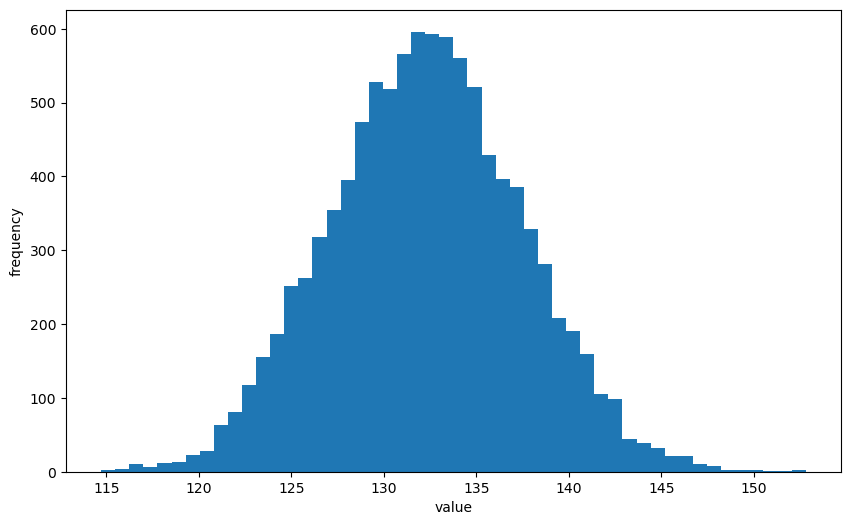

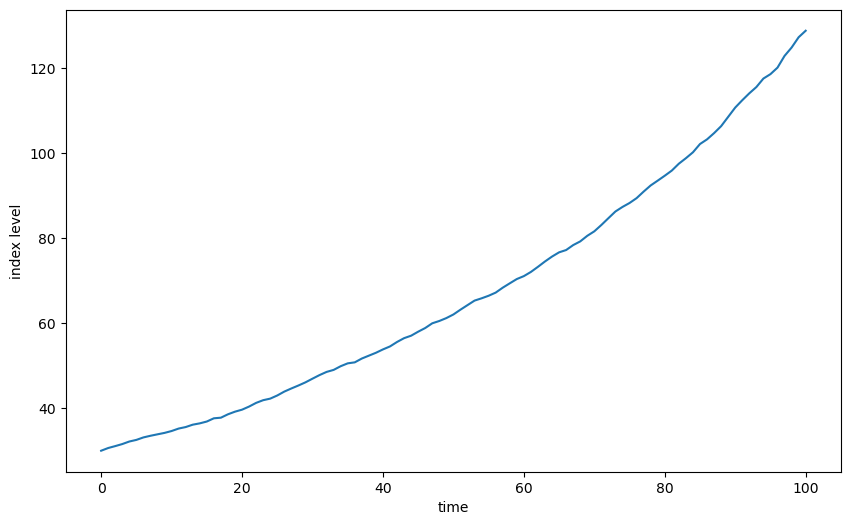

In [27]:
Stochastic_process("square root", 1, 100, 1.0, 10000, 30) #method, runs, timeframe, increments, iterations=None, x0=None

In [ ]:
"""

    Created on 09-Apr-2022
    Authors: Kiril Zelenkovski, Petar Jolakoski, Pece Trajanovski

    Subordinator for calculation of CTRWs (O-U process)

"""

## This is an implementation of a simple integrator for a generic
# jump-diffusion process. This includes for a Euler─Mayurama and a Milstein
# integration scheme. To use the Milstein scheme the derivative of the diffusion
# function needs to be given. Created by Leonardo Rydin Gorjão and Pedro G. Lind

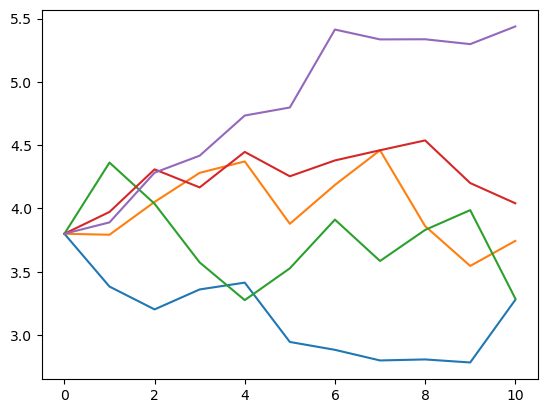

In [26]:
import numpy as np
import math
import numpy.random as npr
import pandas as pd
import random
import scipy.stats as ss

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# mangler markov, levy, gaussian, renewal, branching
class SSP:
    """
    The SSP class of stochastic processes
    """
    
    
    
    def __init__(self, runs, timeframe):
        """
        The SSP class takes in number of runs and timeframe to store it for later use with stochastic processes
        """
        self.runs = runs
        self.timeframe = timeframe


    def random_walk(self, _print_ = False):
        """
        From the SSP class, the number of runs and the timeframe has been indicated.
        By adding True or _print_ = True in the input, the user will have a printout 
        of the mathematical description for the process. For this stochastic process
        no additional information is needed and the output will be a dataframe with
        number of runs times timeframe
        :param _print_: must be True or False
        
        """
        
        if _print_ == True:
            equation = r'$x_t = x_{t-1} + \epsilon_t$'
            printmd(f'This stochastic process is the discrete random walk, with the equation: {equation}, where $\epsilon_t$ is the probability of $^1/_2$ for -1 and $^1/_2$ for +1 at time t')

        all_walks = []
        for i in range(self.runs) :
            random_walk = [0]
            for t in range(self.timeframe) :
                step = random_walk[-1]
                probability = np.random.randint(0,2)
                if probability == 0:
                    step = step + 1
                elif probability == 1:
                    step = step - 1
                random_walk.append(step)
            all_walks.append(random_walk)
        dataframe_allwalks = np.array(all_walks)
        dataframe_allwalks_transposed = np.transpose(dataframe_allwalks)
        return dataframe_allwalks_transposed    
    
    def wiener_process(self, x0 = 1, _print_ = False):
        """
        From the SSP class, the number of runs and the timeframe has been indicated.
        By adding True or _print_ = True in the input, the user will have a printout 
        of the mathematical description for the process. For this stochastic process
        x0 is needed as additional information and the output will be a dataframe 
        with number of runs times timeframe
        :param _print_: must be True or False
        :param x0: Is set to be 1, unless changed by the user.
        """
        if _print_ == True:
            equation = r'$x_t = x_{t-1} + (^{N_{dist}} /_{\sqrt{t_2 - t_1}})$'
            printmd(f'This stochastic process is the discrete wiener process, with the equation: {equation}, where' +r'${N_{dist}}$'+' is the standard normal distribution and $\sqrt T$ is the squareroot of the time difference between steps')
        
        all_walks = []
        for j in range(self.runs):
            walk = np.zeros((self.timeframe))
            walk[0] = x0
            for i in range(1, self.timeframe):
                yi = np.random.normal()
                walk[i] = walk[i-1]+(yi/np.sqrt(1))
            all_walks.append(walk)
        dataframe_allwalks = np.array(all_walks)
        dataframe_allwalks_transposed = np.transpose(dataframe_allwalks)

        return dataframe_allwalks_transposed
    
    
    def wiener_process_wd(self, x0 = 1, sigma=0.25, r = 0.05, _print_ = False):
        """
        From the SSP class, the number of runs and the timeframe has been indicated.
        By adding True or _print_ = True in the input, the user will have a printout 
        of the mathematical description for the process. For this stochastic process
        x0 is needed as additional information and the output will be a dataframe 
        with number of runs times timeframe
        :param _print_: must be True or False
        :param x0: Is set to be 1, unless changed by the user.
        :param sigma: is set to be 0.25, unless changed by the user.
        """
        
        if _print_ == True:
            equation = r'$x_t = x_{t-1} \cdot e^{r-0.5\cdot \sigma^{2}} \cdot dt + \sigma \cdot \sqrt{dt} \cdot N_{dist}$'
            printmd(f'This stochastic process is the discrete financial wiener process with drift, with the equation: {equation} where' + r'${N_{dist}}$'+' is the standard normal distribution and $e^{r-0.5\cdot \sigma^{2}}$ is the drift w.r.t the risk-free rate and the standard deviation')
            
        dt = 1/self.timeframe
        walks = np.zeros((self.timeframe, self.runs))
        walks[0] = x0
        for t in range(1, self.timeframe):
            walks[t] = walks[t - 1] * np.exp((r - 0.5*sigma ** 2) * dt +
                    sigma * math.sqrt(dt) * npr.standard_normal(self.runs))

        return walks
    
    def geometric_brownian_motion(self, x0 = 1, mu = 1, sigma = 0.25, _print_ = False):
        """
        From the SSP class, the number of runs and the timeframe has been indicated.
        By adding True or _print_ = True in the input, the user will have a printout 
        of the mathematical description for the process. For this stochastic process
        x0, mu and sigma are needed as additional information and the output will be
        a dataframe with number of runs times timeframe.
        :param _print_: must be True or False
        :param x0: Is set to be 1, unless changed by the user
        :param mu: Is set to be 1, unless changed by the user
        :param sigma: Is set to be 0.25, unless changed by the user.
        """
        
        if _print_ == True:
            equation = r'$x_t = x_{0} \cdot \prod_{1}^{t}  e^{\mu - \sigma^2 / 2} \cdot dt + \sigma \cdot N(0,\sqrt t)$'
            # This stochastic process is the discrete wiener process, with the equation: {equation}, where' +r'${N_{dist}}$'+' is the standard normal distribution and $\sqrt T$ is the squareroot of the time difference between steps
            printmd(f'This stochastic process is the exponential wiener process, with the equation: {equation}, where' +r'${N(0,\sqrt{t})}$'+' is the normal distribution and $\sqrt t$ is the squareroot of the time difference between steps')
            printmd(f'$\sigma$ is the standard deviation of the process, the expression'+r'$\prod_{1}^{t}  e^{\mu - \sigma^2 / 2} \cdot dt$'+' is the substantial expression in the process.')
            
        dt = 1 / self.timeframe
        sigmas = np.zeros(self.runs)
        sigmas[0:len(sigmas)] = sigma

        walks = np.exp(
            (mu - sigma ** 2 / 2) * dt
            + sigma * np.random.normal(0, np.sqrt(dt), size=(len(sigmas), self.timeframe)).T
        )
        walks = np.vstack([np.ones(len(sigmas)), walks])
        walks = x0 * walks.cumprod(axis=0)
        walks = np.asarray(walks)
        return walks
    
    def euler_maruyama_ornstein_uhlenbeck(self, x0 = 1, theta = 0.5, mu = 1, sigma = 0.25, _print_ = False):
        """
        From the SSP class, the number of runs and the timeframe has been indicated.
        By adding True or _print_ = True in the input, the user will have a printout 
        of the mathematical description for the process. For this stochastic process
        x0, theta, mu and sigma are needed as additional information and the output 
        will be a dataframe with number of runs times timeframe.
        :param _print_: must be True or False
        :param x0:      Is set to be 1, unless changed by the user
        :param theta:   Is set to be 0.5, unless changed by the user
        :param mu:      Is set to be 1, unless changed by the user
        :param sigma:   Is set to be 0.25, unless changed by the user.
        """
        
        if _print_ == True:
            equation = r'$x_t = x_{t-1} + \theta \cdot (\mu - x_{t-1})\cdot dt + \sigma \cdot N_{dist}$'
            printmd(f'This stochastic process is the Euler-Maruyama method on the Ornstein-Uhlenbeck process, with the equation: {equation}')
            printmd(f'Where '+r'$\theta$'+ ' is the speed by which the process drifts back to the mean')
            printmd(f'$\mu$ is the mean for which the process drifts towards')
            printmd(f'$\sigma$ is the standard deviation of the process, ' +r'${N_{dist}}$'+' is the standard normal distribution and together this last term becomes the white noise process with amplitude $\sigma$')
        dt = 1.0 / self.timeframe 
        walks = np.zeros((self.timeframe, self.runs))
        walks[0] = x0
        for t in range(1, self.timeframe):
            walks[t] = walks[t-1] + theta *(mu - walks[t-1]) * dt + sigma * npr.standard_normal(self.runs)
        return walks    
    
    
    def square_root_diffusion_process(self,  x0 = 1, theta = 0.5, mu = 1 ,sigma = 0.25, typ = 'Euler', _print_ = False):
        """
        From the SSP class, the number of runs and the timeframe has been indicated.
        By adding True or _print_ = True in the input, the user will have a printout 
        of the mathematical description for the process. For this stochastic process
        x0, theta, mu and sigma are needed as additional information and the output 
        will be a dataframe with number of runs times timeframe.
        :param _print_: must be True or False
        :param x0:      Is set to be 1, unless changed by the user
        :param theta:   Is set to be 0.5, unless changed by the user
        :param mu:      Is set to be 1, unless changed by the user
        :param sigma:   Is set to be 0.25, unless changed by the user.
        """
        walkh = np.zeros((self.timeframe,self.runs))
        walks = np.zeros((self.timeframe,self.runs))
        walkh[0] = x0
        walks[0] = x0
        dt = 1.0

        if typ.lower() =="euler":
            for t in range(1, self.timeframe):
                walkh[t] = (walkh[t - 1] +
                         theta * (mu - np.maximum(walkh[t - 1], 0)) * dt +
                         sigma * np.sqrt(np.maximum(walkh[t - 1], 0)) *
                         np.sqrt(dt) * npr.standard_normal(self.runs))
            walks = np.maximum(walkh, 0)
            equation = r'$x_t = x_{t-1} + \theta \cdot (\mu - max(x_{t-1}, 0)) \cdot dt + \sigma \cdot \sqrt {max(x_{t-1}, 0))} \cdot \sqrt{dt} \cdot N_{dist}$'

        elif typ.lower() =="exact":
            for t in range(1, self.timeframe):
                df = 4 * mu * theta / sigma ** 2
                c = (sigma ** 2 * (1 - np.exp(-theta * dt))) / (4 * theta)
                nc = np.exp(-theta * dt) / c * walks[t - 1] 
                walks[t] = c * npr.noncentral_chisquare(df, nc, size=self.runs)
            equation = r'$x_t = \frac{\sigma^2 \cdot (1 - e^{-\theta \cdot dt})}{(4\theta)} \cdot \chi^2 \left (4 \mu \cdot \frac{\theta}{\sigma^2}, \frac{e^{-\theta \cdot dt}}{\frac{\sigma^2 \cdot (1 - e^{-\theta \cdot dt})}{(4\theta)}} \cdot x_{t-1}  \right )$'
        
        if _print_ == True:
            printmd(f'This stochastic process is the mean-reverting square-root diffusion process, with the equation:  {equation}')
            printmd(f'Where the process can be simulated as an exact or euler approximation')
            printmd(f'$\mu$ is the mean for which the process drifts towards')
            printmd(f''+r'$\theta$'+' is the speed for which the process drifts towards the means')
            printmd(f'$\sigma$ is the standard deviation of the process, ' +r'${N_{dist}}$'+' is the standard normal distribution and $\chi^2$ is the chi-squared distribution with its perimeters')
        return walks
    
   

   

    def ornstein_uhlenbeck(self, x0=1, sigma=0.5, kappa=1, theta = 1,_print_ = False):
        """
        From the SSP class, the number of runs and the timeframe has been indicated.
        By adding True or _print_ = True in the input, the user will have a printout 
        of the mathematical description for the process. For this stochastic process
        x0, theta, mu and sigma are needed as additional information and the output 
        will be a dataframe with number of runs times timeframe.
        :param _print_: must be True or False
        :param x0:      Is set to be 1, unless changed by the user
        :param theta:   Is set to be 1, unless changed by the user
        :param kappa:   Is set to be 1, unless changed by the user
        :param sigma:   Is set to be 0.5, unless changed by the user.
        """
        
        if _print_ == True:
            equation = r'$x_t = \theta + e^{-\kappa \cdot dt}\cdot (x_{t-1} - \theta) + \sqrt{ \frac{\sigma^2}{2\kappa} \cdot (1-e^{-2\kappa \cdot dt}) } \cdot N_{dist}$'
            printmd(f'This stochastic process is the Ornstein-Uhlenbeck process, with the equation:  {equation}')
            printmd(f''+r'$\theta$'+' is the speed for which the process drifts towards the means')
            printmd(f'$\kappa$ is the mean for which the process drifts towards')
            printmd(f'$\sigma$ is the standard deviation of the process, ' +r'${N_{dist}}$'+' is the standard normal distribution')
        
        N = self.timeframe
        T_vec, dt = np.linspace(0, self.timeframe, N, retstep=True ) 
        std_asy = np.sqrt( sigma**2 /(2*kappa) )   # asymptotic standard deviation
        paths = np.zeros((self.runs,N))
        paths[:,0] = x0
        W = ss.norm.rvs( loc=0, scale=1, size=(self.runs,N-1) )

        std_dt = np.sqrt( sigma**2 /(2*kappa) * (1-np.exp(-2*kappa*dt)) )
        for t in range(0,N-1):
            paths[:,t+1] = theta + np.exp(-kappa*dt)*(paths[:,t]-theta) + std_dt * W[:,t]

        paths = paths.tolist()
        
        return paths
    
    
    
########################################################################################################################################################################################################
  
    def get_dW(T: int, random_state = 1) -> np.ndarray:
        """
        Sample T times from a normal distribution,
        to simulate discrete increments (dW) of a Brownian Motion.
        Optional random_state to reproduce results.
        """
        np.random.seed(random_state)
        return np.random.normal(0.0, 1.0, T)


    def get_W(T: int, random_state = 1) -> np.ndarray:
        """
        Simulate a Brownian motion discretely samplet at unit time increments.
        Returns the cumulative sum
        """
        dW = get_dW(T, random_state)
        # cumulative sum and then make the first index 0.
        dW_cs = dW.cumsum()
        return np.insert(dW_cs, 0, 0)[:-1]


    def get_OU(T = 30, alpha = 1, gamma = 1, beta = 1, X_0 = 1, random_state = 1,) -> np.ndarray:
        """
        - T is the sample size.
        - Ou_params is an instance of OUParams dataclass.
        - X_0 the initial value for the process, if None, then X_0 is taken
            to be gamma (the asymptotic mean).
        Returns a 1D array.
        -alpha is mean reversion parameter
        -gamma is long term mean, asymptotic mean
        -beta is brownian motion scale (standard deviation)
        """
        t = np.arange(T, dtype=np.float64) # float to avoid np.exp overflow
        
        
        exp_alpha_t = np.exp(-alpha * t)
        
        #the brownian motion time steps
        dW = get_dW(T, random_state)
        
        #the integral with respect to the brownian motion
        #integral_W = _get_integal_W(t, dW, OU_params)
        
        exp_alpha_s = np.exp(alpha * t)
        integral_W = np.cumsum(exp_alpha_s * dW)
        integral_W = np.insert(integral_W, 0, 0)[:-1]
        
        #select_X_0
        if X_0 is not None:
            _X_0 = X_0
        else:
            _X_0 = gamma

        
        return ( _X_0 * exp_alpha_t + gamma * (1 - exp_alpha_t) + beta * exp_alpha_t * integral_W) 

########################################################################################################################################################################################################   
    
    def jump_paths(self, p = False):
        if p == True:
            equation = r'$$ x_t = e^{ cumsum  ( r - 0.5 * \sigma^2) - \lambda * (\mu + 0.5*{var}^2)\cdot dt + \frac{1}{ \sigma \cdot \sqrt{dt} \cdot \frac{1}{N_{dist} } + Pois( \lambda \cdot dt) * cumsum(N_{dist}(\mu, var) }}*x_{0} $$'
            printmd(f'Jump diffusion process found: {equation}')
        x0 = float(input('x0:'))
        r = float(input('risk-free rate:'))
        sigma = float(input('sigma:'))
        m = float(input('jump mean:'))  
        v = float(input('jump std:')) 
        lam = float(input('jump rate:')) 
        steps = self.timeframe
        size=(steps,self.runs)
        dt = 1.0 
        poi_rv = np.multiply(np.random.poisson( lam*dt, size=size),
                             np.random.normal(m,v, size=size)).cumsum(axis=0)
        geo = np.cumsum(((r -  sigma**2/2 -lam*(m  + v**2*0.5))*dt + \
                                  sigma*np.sqrt(dt) * \
                                  np.random.normal(size=size)), axis=0)
       
        return np.exp(geo+poi_rv)*x0
    
    def stoch_vol(self, p = False):
        if p == True:
            equation = r'$$ V_t = V_{t-1} + \kappa \cdot (\theta - max(V_{t-1},0)) \cdot dt + \sigma \cdot \sqrt{max(V_{t-1},0)} \cdot ( \hat{c} \cdot N_{dist}) \cdot \sqrt{dt} $$'
            equation2 = r'$$ S_t = S_{t-1} \cdot e^{r-0.5 \cdot V_t} \cdot dt + \sqrt{V_t} \cdot ( \hat{c} \cdot N_{dist}) \cdot \sqrt{dt} $$'
            printmd(f' Jump diffusion process found: {equation} {equation2}')
        dt = 1/self.timeframe
        rho = 0.02
        r = 0.05
        sigma = float(input('sigma:'))
        kappa = float(input('longterm volatility (Theta):'))
        theta = float(input('return-rate for volatility (Kappa):'))
        corr_mat = np.zeros((2, 2))
        corr_mat[0, :] = [1.0, rho]
        corr_mat[1, :] = [rho, 1.0]
        cho_mat = np.linalg.cholesky(corr_mat)

        ran_num = npr.standard_normal((2, self.timeframe + 1, self.runs))

        v = np.zeros_like(ran_num[0])
        vh = np.zeros_like(v)

        v[0] = float(input('v0:')) 
        vh[0] = v[0]

        for t in range(1, self.timeframe + 1):
            ran = np.dot(cho_mat, ran_num[:, t, :])
            vh[t] = (vh[t - 1] +
                     kappa * (theta - np.maximum(vh[t - 1], 0)) * dt +
                     sigma * np.sqrt(np.maximum(vh[t - 1], 0)) * 
                     math.sqrt(dt) * ran[1])

        v = np.maximum(vh, 0)

        Sv = np.zeros_like(ran_num[0])
        Sv[0] = float(input('s0:'))
        for t in range(1, self.timeframe + 1):
            ran = np.dot(cho_mat, ran_num[:, t, :])
            Sv[t] = Sv[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
                            np.sqrt(v[t]) * ran[0] * np.sqrt(dt))
        print("Stock value prediction")
        return Sv
    
    def markov(self, p = False):
        walks = []
        return walks
    

    
S = SSP(5,10)   
#S.random_walk()
#S.wiener_process()
#S.wiener_process_wd()

#S.square_root_diffusion_process()
#S.euler_maruyama_ornstein_uhlenbeck()
import matplotlib.pyplot as plt
plt.plot(S.geometric_brownian_motion(x0 = 3.8, mu=0, sigma = 0.25 ))
plt.show()

#S.poisson()

#S.ornstein_uhlenbeck()
#S.get_dW()
#S.get_W()
#S.get_OU()

#S.jump_paths()
#S.stoch_vol()
#S.markov()


#get_dW(30) #differences between t and t+1 in the Wiener process/brownian motion
#get_W(30) # accumulated value of the Wiener process
#get_OU_process()


In [19]:
import numpy as np
import math
import numpy.random as npr
import matplotlib.pyplot as plt


class SSP:
    """
    The SSP class of stochastic processes
    """
    
    def __init__(self, runs, timeframe):
        """
        The SSP class takes in number of runs and timeframe to store it for later use with stochastic processes
        """
        self.runs = runs
        self.timeframe = timeframe


    def jump_paths(self, x0 = 1, r = 0.05, sigma = 0.25, m = 1, v = 0.25, lam = 1, _print_=False):
        """
    
        """    
        if _print_ == True:
            equation = r'$ x_t = e^{ cumsum  ( r - 0.5 * \sigma^2) - \lambda * (\mu + 0.5*{var}^2)\cdot dt + \frac{1}{ \sigma \cdot \sqrt{dt} \cdot \frac{1}{N_{dist} } + Pois( \lambda \cdot dt) * cumsum(N_{dist}(\mu, var) }}*x_{0} $'
            printmd(f'Jump diffusion process found: {equation}')
        
        if x0 is None:
            X[0] = np.random.normal(loc=0, scale=np.sqrt(delta_t), size=1)
        else:
            assert isinstance(x0, int) or isinstance(x0, float), ("'init' is "
                "not an int or float")
            X[0] = float(init)
        
        
        steps = self.timeframe
        size=(steps, self.runs)
        dt = 1.0 
        
        # Generate the Gaussian noise
        dw = np.random.normal(loc=0, scale=np.sqrt(delta_t), size=size)

        # Generate the Poissonian Jumps
        dJ = np.random.poisson(lam=lamb * delta_t, size=size)
        
        
        poisson_randomvariable = np.multiply(np.random.poisson( lam*dt, size=size), np.random.normal(m,v, size=size)).cumsum(axis=0)
        geometric_randomvariable = np.cumsum(((r -  sigma**2/2 -lam*(m  + v**2*0.5))*dt + sigma*np.sqrt(dt) * np.random.normal(size=size)), axis=0)
       
        return np.exp(geometric_randomvariable+poisson_randomvariable)*x0
    

        def poisson(self, p = False):
            """
            
            """
            
            if p == True:
                equation = r'$$x_t = x_{t-1} + P_{dist}$$'
                printmd(f'Poisson process found: {equation}')
            typ = input('Time or Event based:')
            _lambda = float(input('lambda:'))
            _event_num = []
            _inter_event_times = []
            _event_times = []
            _event_time = 0
            result = [] 
            j = 1
            if typ.lower() == "time":
                while _event_time < self.timeframe:
                    _event_num.append(j)
                    n = random.random()
                    _inter_event_time = -math.log(1.0 - n) / _lambda
                    _inter_event_times.append(_inter_event_time)
                    _event_time = _event_time + _inter_event_time
                    _event_times.append(_event_time)
                    result.append([j,_event_time])
                    j = j + 1

            elif typ.lower() == "event":
                _num_events = int(input('number of events:'))
                for i in range(_num_events):
                    _event_num.append(i)
                    #Get a random probability value from the uniform distribution's PDF
                    n = random.random()

                    #Generate the inter-event time from the exponential distribution's CDF using the Inverse-CDF technique
                    _inter_event_time = -math.log(1.0 - n) / _lambda
                    _inter_event_times.append(_inter_event_time)

                    #Add the inter-event time to the running sum to get the next absolute event time
                    _event_time = _event_time + _inter_event_time
                    _event_times.append(_event_time)
                    result.append([i,_event_time])


            result = pd.DataFrame(result)

            return result
    
    
    



    # Integration, either Euler
    if solver == 'Euler':
        for i in range(1, length):
            X[i] = X[i-1] + a(X[i-1]) * delta_t + b(X[i-1]) * dw[i]
            if dJ[i] > 0.:
                # correction by @JChonpca_Huang (issue #5)
                X[i] += np.sum(np.random.normal(0, np.sqrt(xi), size=dJ[i]))

    if solver == 'Milstein':
        # Generate corrective terms of the Milstein integration method
        dw_2 = (dw**2 - delta_t) * 0.5

        for i in range(1, length):
            X[i] = X[i-1] + a(X[i-1]) * delta_t + b(X[i-1]) * dw[i] \
                    + b(X[i-1]) * b_prime(X[i-1]) * dw_2[i]
            if dJ[i] > 0.:
                # correction by @JChonpca_Huang (issue #5)
                X[i] += np.sum(np.random.normal(0, np.sqrt(xi), size=dJ[i]))

    return X


a = lambda x: -2*x
b = lambda x: 1
jp = jd_process(30,1.0,a, b, 1, 1)


    
    
    
S = SSP(1,30)

help(SSP.ornstein_uhlenbeck)
S.ornstein_uhlenbeck(_print_ = True)

Help on function ornstein_uhlenbeck in module __main__:

ornstein_uhlenbeck(self, x0=1, sigma=0.5, kappa=1, theta=1, _print_=False)
    From the SSP class, the number of runs and the timeframe has been indicated.
    By adding True or _print_ = True in the input, the user will have a printout 
    of the mathematical description for the process. For this stochastic process
    x0, theta, mu and sigma are needed as additional information and the output 
    will be a dataframe with number of runs times timeframe.
    :param _print_: must be True or False
    :param x0:      Is set to be 1, unless changed by the user
    :param theta:   Is set to be 1, unless changed by the user
    :param kappa:   Is set to be 1, unless changed by the user
    :param sigma:   Is set to be 0.5, unless changed by the user.



This stochastic process is the Ornstein-Uhlenbeck process, with the equation:  $x_t = \theta + e^{-\kappa \cdot dt}\cdot (x_{t-1} - \theta) + \sqrt{ \frac{\sigma^2}{2\kappa} \cdot (1-e^{-2\kappa \cdot dt}) } \cdot N_{dist}$

$\theta$ is the speed for which the process drifts towards the means

$\kappa$ is the mean for which the process drifts towards

$\sigma$ is the standard deviation of the process, ${N_{dist}}$ is the standard normal distribution

[[1.0,
  1.5259069483878505,
  1.8686915284790113,
  1.2136659853648482,
  0.5990898589981237,
  0.9722321486024268,
  0.9925079932952525,
  1.0327292042829619,
  0.5630569226251736,
  0.8172611545946514,
  1.147326540097035,
  1.1875892993090416,
  0.47052454697842194,
  1.3041956119380484,
  0.6843828019368932,
  0.8606303217317588,
  1.4101602727627458,
  1.581433775560153,
  1.061385853989485,
  0.5036609728620812,
  0.7229237181191177,
  0.9200931443381182,
  1.1354096010348913,
  1.0339108794673775,
  1.099601758413837,
  1.2469643232113952,
  0.42845623264947597,
  0.711247961758826,
  0.7706335100312547,
  0.2690303049489081]]

In [56]:
equation = r'$ \mathrm{d} X(t) = a(x,t)\;\mathrm{d} t + b(x,t)\;\mathrm{d} W(t)+ \xi\;\mathrm{d} J(t) $'
printmd(f'Jump diffusion process found: {equation}')

a = lambda x: -2*x
b = lambda x: 1
b_prime = lambda x: 0

steps = 30
size=(steps, 2)
solver ='Milstein'

paths = np.zeros(size)

# Generate the Gaussian noise
dw = np.random.normal(loc=0, scale=np.sqrt(1.0), size=size)
# Generate the Poissonian Jumps
dJ = np.random.poisson(lam=1 * 1.0, size=size)


# Integration, either Euler
for j in range(0,2):
    if solver == 'Euler':
        for i in range(1, steps):
            paths[i][j] = paths[i-1][j] + a(paths[i-1][j]) * 1.0 + b(paths[i-1][j]) * dw[i][j]
            if dJ[i][j] > 0.:
                # correction by @JChonpca_Huang (issue #5)
                paths[i][j] += np.sum(np.random.normal(0, np.sqrt(0.25), size=dJ[i][j]))

    if solver == 'Milstein':
        # Generate corrective terms of the Milstein integration method
        dw_2 = (dw**2 - 1.0) * 0.5

        for i in range(1, steps):
            paths[i][j] = paths[i-1][j] + a(paths[i-1][j]) * 1.0 + b(paths[i-1][j]) * dw[i][j] + b(paths[i-1][j]) * b_prime(paths[i-1]) * dw_2[i][j]
            if dJ[i][j] > 0.:
                # correction by @JChonpca_Huang (issue #5)
                paths[i][j] += np.sum(np.random.normal(0, np.sqrt(0.25), size=dJ[i][j]))

In [57]:
paths

array([[ 0.        ,  0.        ],
       [ 1.52508514, -1.50915503],
       [-1.63598762,  2.12849072],
       [ 3.11651588, -2.6067935 ],
       [-4.60075184,  4.30120085],
       [ 4.4514384 , -2.4048039 ],
       [-4.60078126,  1.30376051],
       [ 3.39862618, -1.67158554],
       [-3.84100202,  2.15569043],
       [ 5.31713092, -1.5642939 ],
       [-3.46807744,  1.95129609],
       [ 2.94577846, -1.87796367],
       [-2.76630213,  0.69180015],
       [ 1.89673336, -0.73930932],
       [-1.11808249, -1.06972361],
       [ 3.38087927,  0.72216974],
       [-5.67638947,  0.04940392],
       [ 6.47323274,  1.12857833],
       [-5.8713988 ,  1.83056598],
       [ 7.12629548, -2.7595664 ],
       [-5.19170193,  3.41712862],
       [ 5.14656753, -3.05020586],
       [-5.0368952 ,  4.67823711],
       [ 6.59273097, -3.81954783],
       [-6.5215958 ,  3.18314064],
       [ 6.73910713, -2.47001649],
       [-6.33885006,  2.25692775],
       [ 5.89904257, -0.86347055],
       [-5.42087093,

In [36]:
def jd_process(time: float, delta_t: float, a: callable, b: callable,
        xi: float, lamb: float, init: float = None, solver: str = 'Euler',
        b_prime: callable = None) -> np.ndarray:
    r"""
    Integrates a jump-diffusion process with drift a(x), diffusion b(x), jump
    amplitude xi (:math:`\xi`), and jump rate lamb (:math:`\lambda`).

    .. math::

       \mathrm{d} X(t) = a(x,t)\;\mathrm{d} t + b(x,t)\;\mathrm{d} W(t)
       + \xi\;\mathrm{d} J(t),

    with :math:`J` Poisson with jump rate :math:`\lambda`. This integrator has
    both an Euler─Maruyama and a Milstein method of integration. For Milstein
    one has to introduce the derivative of the diffusion term ``b``, denoted
    ``b_prime``.

    Parameters
    ----------
    time: float > 0
        Total integration time. Positive float or int.

    delta_t: float > 0
        Time sampling, the smaller the better.

    a: callable
        The drift function. Can be a function of a ``lambda``. For an
        Ornstein─Uhlenbeck process with drift ``-2*x``, a takes the form
            ``a =  lambda x: -2*x``.

    b: callable
        The diffusion function. Can be a function of a ``lambda``. For an
        Ornstein─Uhlenbeck process with diffusion ``1``, a takes the form
            ``b =  lambda x: 1``.

    xi: float > 0
        Variance of the jump amplitude, which will be turned into a normal
        distribution like :math:`\mathcal{N}`\ ``(0,√xi)``.

    lamb: float > 0
        Jump rate of the Poissonian jumps. This is implemented as the numpy
        function ``np.random.poisson(lam = lamb * delta_t)``.

    init: float (defaul ``None``)
        Initial conditions. If ``None`` given, generates a random value from a
        normal distribution ~ :math:`\mathcal{N}`\ ``(0,√delta_t)``.

    solver: 'Euler' or 'Milstein' (defaul 'Euler')
        The regular Euler─Maruyama solver 'Euler' is the default, with an order
        of ``√delta_t``. To employ a state-dependent diffusion, i.e., b(x) as a
        function of x, the Milstein scheme has an order of ``delta_t``. You must
        introduce as well the derivative of b(x), i.e., b'(x), as the argument
        ``b_prime``.

    Returns
    -------
    X: np.array
        Timeseries of size ``int(time/delta_t)``
    """

    # assert and conditions
    assert time > 0, "Total integration time must be positive"
    assert delta_t > 0, "Time sampling must be positive"
    if solver == 'Milstein':
        assert b_prime != None, "Introduce b'(x) to use the Milstein solver"
        assert callable(b_prime) == True, "b'(x) must be a function"

    assert callable(a) == True, "drift a(x) must be a function"
    assert callable(b) == True, "diffusion b(x) must be a function"
    assert isinstance(lamb, int) or isinstance(lamb, float), ("'lamb' is not an"
            " int or float")
    assert isinstance(xi, int) or isinstance(xi, float), ("'xi' is not an int "
            "or float")


    # Define total length of timeseries
    length = int(time/delta_t)

    # Initialise the array X
    X = np.zeros(length)

    # randomise initial starting value or use given (after assert)
    if init is None:
        X[0] = np.random.normal(loc=0, scale=np.sqrt(delta_t), size=1)
    else:
        assert isinstance(init, int) or isinstance(init, float), ("'init' is "
            "not an int or float")
        X[0] = float(init)

    # Generate the Gaussian noise
    dw = np.random.normal(loc=0, scale=np.sqrt(delta_t), size=length)

    # Generate the Poissonian Jumps
    dJ = np.random.poisson(lam=lamb * delta_t, size=length)


    # Integration, either Euler
    if solver == 'Euler':
        for i in range(1, length):
            X[i] = X[i-1] + a(X[i-1]) * delta_t + b(X[i-1]) * dw[i]
            if dJ[i] > 0.:
                # correction by @JChonpca_Huang (issue #5)
                X[i] += np.sum(np.random.normal(0, np.sqrt(xi), size=dJ[i]))

    if solver == 'Milstein':
        # Generate corrective terms of the Milstein integration method
        dw_2 = (dw**2 - delta_t) * 0.5

        for i in range(1, length):
            X[i] = X[i-1] + a(X[i-1]) * delta_t + b(X[i-1]) * dw[i] \
                    + b(X[i-1]) * b_prime(X[i-1]) * dw_2[i]
            if dJ[i] > 0.:
                # correction by @JChonpca_Huang (issue #5)
                X[i] += np.sum(np.random.normal(0, np.sqrt(xi), size=dJ[i]))

    return X




from sklearn.linear_model import LinearRegression

def estimate_OU_params(X_t: np.ndarray):
    """
    Estimate OU params from OLS regression.
    - X_t is a 1D array.
    Returns instance of OUParams.
    """
    y = np.diff(X_t)
    X = X_t[:-1].reshape(-1, 1)
    reg = LinearRegression(fit_intercept=True)
    reg.fit(X, y)
    # regression coeficient and constant
    alpha = -reg.coef_[0]
    gamma = reg.intercept_ / alpha
    # residuals and their standard deviation
    y_hat = reg.predict(X)
    beta = np.std(y - y_hat)
    return [alpha, gamma, beta]


estimate_OU_params(get_OU_process())



# numpy
import numpy as np
from numpy.random import default_rng
rng = default_rng()

# import functions
from numpy import log, log10, sin, cos, exp, sqrt, pi

# plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# progress bar
from tqdm.notebook import tqdm
from tqdm import trange
from time import sleep
from tqdm import tqdm

# warnings
import warnings
warnings.simplefilter('ignore')
# diffusion equation analytical solution


array([1.        , 1.59756326, 0.99477863, 0.80377564, 0.53308999,
       1.14659908, 0.20724202, 1.35024101, 0.8488141 , 1.06174974,
       0.93097823, 1.51248776, 0.4306503 , 0.67193729, 0.73802677,
       1.3207159 , 0.7133574 , 0.83111729, 0.61492546, 0.87386856,
       1.16800457, 0.65691026, 1.29490466, 1.44016605, 1.34678538,
       1.45898159, 0.91732047, 0.92437511, 0.62792882, 0.76457215])

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

##########################################################################################################################################################################################################################

# Arithmetic Brownian Motion

class Arithmetic_Brownian_Motion:
    """dS = mu*dt + sigma*dW
    Requires numpy, pandas and plotly.express to run"""
    def __init__(self, mu, sigma, n_paths, n_steps, t, T, S_0):
        self.mu = mu
        self.sigma = sigma
        self.n_paths = n_paths
        self.n_steps = n_steps
        self.t = t
        self.T = T
        self.S_0 = S_0
        
    def get_paths(self):
        """Returns the paths, S, for the Arithmetic Brownian Motion using the Euler-Maruyama method"""
        dt = self.T/self.n_steps
        dW = np.sqrt(dt)*np.random.randn(self.n_paths, self.n_steps)
        dS = self.mu*dt + self.sigma*dW
        
        dS = np.insert(dS, 0, self.S_0, axis=1)
        S = np.cumsum(dS, axis=1)
        
        return S
    
    def get_expectation(self):
        """Returns the expectation, E[S], for the Arithmetci Brownian Motion"""
        ES = self.mu*self.t+self.S_0
        return ES
    
    def get_variance(self):
        """Returns the variance, Var[S], for the Arithmetic Brownian Motion"""
        VarS = self.t*self.sigma**2
        return VarS
    
    def get_auto_cov(self, t1, t2):
        """Returns the auto-covariance for the Arithmetic Brownian Motion"""
        AC = (self.sigma**2)*min(self.t[t1], self.t[t2])
        return AC
    
    def simulate(self, plot_expected=False):
        """Returns the plot of the random paths taken by the Arithmatic Brownian Motion"""
        plotting_df = pd.DataFrame(self.get_paths().transpose())
        if plot_expected==True:
            plotting_df["Expected Path"]=self.get_expectation()
        fig = px.line(plotting_df, labels={"value":"Value of S", "variable":"Paths"})
        return fig.show()


#Geometric Brownian Motion

class Geometric_Brownian_Motion:
    """dS = mu*S*dt + sigma*S*dW
    Model describing the evolution of stock prices
    Requires numpy, pandas and plotly.express to run"""
    def __init__(self, mu, sigma, n_paths, n_steps, t, T, S_0):
        self.mu = mu
        self.sigma = sigma
        self.n_paths = n_paths
        self.n_steps = n_steps
        self.t = t
        self.T =T
        self.S_0 = S_0
    
    def get_paths(self):
        """Returns the paths, S, for the Geometric Brownian Motion using Euler-Maruyama method"""
        dt = self.T/self.n_steps
        dW = np.sqrt(dt)*np.random.randn(self.n_paths, self.n_steps)
        dS = (self.mu-0.5*self.sigma**2)*dt + self.sigma*dW
        
        dS = np.insert(dS, 0, 0, axis=1)
        S = np.cumsum(dS, axis=1)
        
        S = self.S_0*np.exp(S)
        return S
    
    def get_expection(self):
        """Returns the expectation, E[S], of the Geometric Brownian Motion"""
        ES = self.S_0*np.exp(self.mu*self.t)
        return ES
    
    def get_variance(self):
        """Returns the variance, Var[S], of the Geometric Brownian Motion"""
        VarS = (self.S_0**2)*np.exp(2*self.mu*self.t)*(np.exp(self.t*self.sigma**2)-1)
        return VarS
    
    def simulate(self, plot_expected=False):
        """Returns the plot of the random paths taken by the Geometric Brownian Motion"""
        plotting_df = pd.DataFrame(self.get_paths().transpose())
        if plot_expected==True:
            plotting_df["Expected Path"]=self.get_expection()
        fig = px.line(plotting_df, labels={"value":"Value of S", "variable":"Paths"})
        return fig.show()

#Ornstein-Uhlenbeck Process

class Ornstein_Uhlenbeck_Process:
    """dS = alpha*(mu-S)*dt + sigma*dW
    Model describes the evolution of interest rates
    Requires numpy, pandas and plotly.express"""
    def __init__(self, alpha, mu, sigma, n_paths, n_steps, t, T, S_0):
        self.alpha =alpha
        self.mu = mu
        self.sigma = sigma
        self.n_paths = n_paths
        self.n_steps = n_steps
        self.t = t
        self.T =T
        self.S_0 = S_0
    
    def get_paths(self, analytic_EM=False):
        """Returns the paths, S, for the Ornsteain_uhlenbeck Process using Euler-Maruyama method.
        Intakes an argument analytic_EM with bool values. If True, then returns the simulation with the analytic 
        moments for Euler-Maruyama; if False, then returns plain Euler-Maruyama simulation"""
        dt = self.T/self.n_steps
        N = np.random.randn(self.n_steps, self.n_paths)
        S = np.concatenate((self.S_0*np.ones((1, self.n_paths)), np.zeros((self.n_steps, self.n_paths))), axis=0)
            
            
        if analytic_EM==True:
            sdev = self.sigma*np.sqrt((1-np.exp(-2*self.alpha*dt))/(2*self.alpha))
            for i in range(0, self.n_steps):
                S[i+1,:] = self.mu + (S[i,:]-self.mu)*np.exp(-self.alpha*dt) + sdev*N[i,:]
        else:
            sdev = self.sigma*np.sqrt(dt)
            for i in range(0, self.n_steps):
                S[i+1,:] = S[i,:] + self.alpha*(self.mu-S[i,:])*dt + sdev*N[i,:]
        
        return S
    
    def get_expectation(self):
        """Returns the expectation, E[S], for the Ornstein-Uhlenbeck Process"""
        ES = self.mu + (self.S_0-self.mu)*np.exp(-self.alpha*t)
        return ES
    
    def get_variance(self):
        """Returns the variance, Var[S], for the Ornstein-Uhlenbeck Process"""
        VarS = (1-np.exp(-2*self.alpha*t))*(self.sigma**2)/(2*self.alpha)
        return VarS
    
    def simulate(self, analytic_EM=False, plot_expected=False):
        """Returns the plot of the random paths taken by the Ornstain_uhlenbeck Process"""
        plotting_df = pd.DataFrame(self.get_paths(analytic_EM))
        if plot_expected==True:
            plotting_df["Expected Path"]=self.get_expectation()
        fig = px.line(plotting_df, labels={"value":"Value of S", "variable":"Paths"})
        return fig.show()




##########################################################################################################################################################################################################################

#Brownian Bridge

class Brownian_Bridge:
    """dS = ((b-X)/(T-t))*dt + sigma*dW
    Model can support useful variance reduction techniques for pricing derivative contracts using Monte-Carlo simulation, 
    such as sampling. Also used in scenario generation.
    Requires numpy, pandas and plotly.express"""
    def __init__(self, alpha, beta, sigma, n_paths, n_steps, t, T):
        self.alpha =alpha
        self.beta = beta
        self.sigma = sigma
        self.n_paths = n_paths
        self.n_steps = n_steps
        self.t = t
        self.T =T
    
    def get_paths(self):
        """Returns the paths, S, for the Brownian Bridge using the Euler-Maruyama method"""
        dt = self.T/self.n_steps
        dW = np.sqrt(dt)*np.random.randn(self.n_steps, self.n_paths)
        S = np.concatenate((self.alpha*np.ones((1, self.n_paths)),
                             np.zeros((self.n_steps-1, self.n_paths)), self.beta*np.ones((1, self.n_paths))), axis=0)
        
        for i in range(0, self.n_steps-1):
            S[i+1,:] = S[i,:] + (self.beta-S[i,:])/(self.n_steps-i+1) +self.sigma*dW[i,:]
        
        return S
    
    def get_expectation(self):
        """Returns the expectation, E[S], for the Brownian Bridge"""
        ES = self.alpha + (self.beta-self.alpha)/T*t
        return ES
    
    def get_variance(self):
        """Returns the variance, Var[S], for the Brownian Bridge"""
        VarS = self.t*(self.T-self.t)/self.T
        return VarS
    
    def simulate(self, plot_expected=False):
        """Returns the plot of the random paths taken by the Brownian Bridge"""
        plotting_df = pd.DataFrame(self.get_paths())
        if plot_expected==True:
            plotting_df["Expected Path"]=self.get_expectation()
        fig = px.line(plotting_df, labels={"value":"Value of S", "variable":"Paths"})
        return fig.show()




##########################################################################################################################################################################################################################

#Feller Square-Root Process

class Feller_Square_Root_Process:
    """dS = alpha*(mu-S)*dt + sigma*sqrt(S)*dW
    Model describes the evolution of interest rates
    Requires numpy, pandas and plotly.express"""
    def __init__(self, alpha, mu, sigma, n_paths, n_steps, t, T, S_0):
        self.alpha =alpha
        self.mu = mu
        self.sigma = sigma
        self.n_paths = n_paths
        self.n_steps = n_steps
        self.t = t
        self.T =T
        self.S_0 = S_0
    
    def get_paths(self, sim_type="EM", analytic_EM=False):
        """Returns the paths, S, for the Feller Square-Root Process using either Euler-Maruyama method or the exact method.
        For Euler-Maruyama, set sim_type to "EM"; for exact, set it to "E". Intakes an argument analytic_EM with bool values. 
        If True, then returns the simulation with the analytic moments for Euler-Maruyama; if False, then returns plain 
        Euler-Maruyama simulation"""
        dt = self.T/self.n_steps
        N = np.random.randn(self.n_steps, self.n_paths)
        S = np.concatenate((self.S_0*np.ones((1, self.n_paths)), np.zeros((self.n_steps, self.n_paths))), axis=0)   
        
        if sim_type=="EM":
            if analytic_EM==True:
                a = (self.sigma**2)/self.alpha*(np.exp(-self.alpha*dt)-np.exp(-2*self.alpha*dt))
                b = self.mu*(self.sigma**2)/(2*self.alpha)*(1-np.exp(-self.alpha*dt))**2
                for i in range(0, self.n_steps):
                    S[i+1,:] = self.mu + (S[i,:]-self.mu)*np.exp(-self.alpha*dt) + np.sqrt(a*S[i,:]+b)*N[i,:]
                    S[i+1,:] = np.maximum(S[i+1,:], np.zeros((1, self.n_paths)))
            else:
                for i in range(0, self.n_steps):
                    S[i+1,:] = S[i,:] + self.alpha*(self.mu-S[i,:])*dt + self.sigma*np.sqrt(S[i,:]*dt)*N[i,:]
                    S[i+1,:] = np.maximum(S[i+1,:], np.zeros((1, self.n_paths)))
        elif sim_type=="E":
            d = 4*self.alpha*self.mu/(self.sigma**2)
            k = (self.sigma**2)*(1-np.exp(-self.alpha*dt))/(4*self.alpha)
            for i in range(0, self.n_steps):
                delta = 4*self.alpha*S[i,:]/((self.sigma**2)*(np.exp(self.alpha*dt)-1))
                S[i+1,:] = np.random.noncentral_chisquare(d, delta, (1, self.n_paths))*k
        else:
            raise TypeError("sim_type can only take values in [EM, E]")
        
        return S
    
    def get_expectation(self):
        """Returns the expectation, E[S], for the Feller Square-Root Process"""
        ES = self.mu + (self.S_0-self.mu)*np.exp(-self.alpha*t)
        return ES
    
    def get_variance(self):
        """Returns the variance, Var[S], for the Feller Square-Root Process"""
        VarS = ((self.sigma**2)*(np.exp(-self.alpha*self.t)-np.exp(-self.alpha*2*self.t))*self.S_0/self.alpha +
               (self.sigma**2)*np.exp(-self.alpha*2*self.t)*(np.exp(self.alpha*self.t)-1)**2*self.mu/(2*self.alpha))
        return VarS
    
    def simulate(self, sim_type="EM", analytic_EM=False, plot_expected=False):
        """Returns the plot of the random paths taken by the Feller Square-Root Process"""
        plotting_df = pd.DataFrame(self.get_paths(sim_type, analytic_EM))
        if plot_expected==True:
            plotting_df["Expected Path"]=self.get_expectation()
        fig = px.line(plotting_df, labels={"value":"Value of S", "variable":"Paths"})
        return fig.show()




##########################################################################################################################################################################################################################

#Constant Elasticity of Variance

class Constant_Elasticity_Of_Variance:
    """dS = mu*S*dt + sigma*S^(beta+1)*dW
    Model used to reproduce the volatility smile effect
    Requires numpy, pandas and plotly.express"""
    def __init__(self, mu, sigma, n_paths, n_steps, t, T, S_0, beta):
        self.mu = mu
        self.sigma = sigma
        self.n_paths = n_paths
        self.n_steps = n_steps
        self.t = t
        self.T =T
        self.S_0 = S_0
        self.beta = beta
    
    def get_paths(self):
        """Returns the paths, S, for the Constant Elasticity of Variance Process"""
        dt = self.T/self.n_steps
        dW = np.sqrt(dt)*np.random.randn(self.n_steps, self.n_paths)
        S = np.concatenate((self.S_0*np.ones((1, self.n_paths)), np.zeros((self.n_steps, self.n_paths))), axis=0) 
        
        for i in range(0, self.n_steps):
            S[i+1,:] = S[i,:] + self.mu*S[i,:]*dt + self.sigma*(S[i,:]**(self.beta+1))*dW[i,:]
            S[i+1,:] = np.maximum(S[i+1,:], np.zeros((1, self.n_paths)))
        
        return S
    
    def get_expectation(self):
        """Returns the expectation, E[S], for the Constant Elasticity of Variance Process"""
        ES = self.S_0*np.exp(self.mu*self.t)
        return ES
    
    def simulate(self, plot_expected=False):
        """Returns the plot of the random paths taken by the Constant Elasticity of Variance Process"""
        plotting_df = pd.DataFrame(self.get_paths())
        if plot_expected==True:
            plotting_df["Expected Path"]=self.get_expectation()
        fig = px.line(plotting_df, labels={"value":"Value of S", "variable":"Paths"})
        return fig.show()




##########################################################################################################################################################################################################################

#Heston Stochastic Volatility Process

class Heston_Stochastic_Volatility:
    """"dS = mu*S*dt + sqrt(v)*S*dW^{S}
    dv = k*(theta-v)*dt + epsilon*sqrt(v)dW^{v}
    Model describes the evolution of stock price and its volatility
    Requires numpy, pandas and plotly.express"""
    def __init__(self, mu, k, theta, epsilon, n_paths, n_steps, t, T, S_0, v_0, rho):
        self.mu = mu
        self.k = k
        self.theta = theta
        self.epsilon = epsilon
        self.n_paths = n_paths
        self.n_steps = n_steps
        self.t = t
        self.T =T
        self.S_0 = S_0
        self.v_0 = v_0
        self.rho = rho
    
    def get_paths(self):
        """Returns the paths, S, for the Heston Stochastic Volatility Process"""
        dt = self.T/self.n_steps
        Nv = np.random.randn(self.n_steps, self.n_paths)
        N = np.random.randn(self.n_steps, self.n_paths)
        NS = self.rho*Nv + np.sqrt(1-self.rho**2)*N
        
        v = np.concatenate((self.v_0*np.ones((1, self.n_paths)), np.zeros((self.n_steps, self.n_paths))), axis=0)
        S = np.concatenate((self.S_0*np.ones((1, self.n_paths)), np.zeros((self.n_steps, self.n_paths))), axis=0)
        
        a = (self.epsilon**2)/self.k*(np.exp(-self.k*dt)-np.exp(-2*self.k*dt))
        b = self.theta*(self.epsilon**2)/(2*self.k)*(1-np.exp(-self.k*dt))**2
        for i in range(0, self.n_steps):
            v[i+1,:] = self.theta + (v[i,:]-self.theta)*np.exp(-self.k*dt) + np.sqrt(a*v[i,:]+b)*Nv[i,:]
            v[i+1,:] = np.maximum(v[i+1,:], np.zeros((1, self.n_paths)))
        
        for j in range(0, self.n_steps):
            S[j+1,:] = S[j,:] + (self.mu-0.5*v[j,:])*dt + self.epsilon*np.sqrt(v[j,:]*dt)*NS[j,:]
            S[j+1,:] = np.maximum(S[j+1,:], np.zeros((1, self.n_paths)))
        
        return S, v
    
    def get_expectation(self):
        """Returns the expectation, E[S], for the Heston Stochastic Volatility Process"""
        ES = (self.S_0 + (self.mu-0.5*self.theta)*self.t
                         + (self.theta-self.v_0)*(1-np.exp(-self.k*self.t))/(2*self.k))
        return ES
    
    def simulate(self, plot_expected=False):
        """Returns the plot of the random paths taken by the Heston Stochastic Volatility Process"""
        plotting_df = pd.DataFrame(self.get_paths()[0])
        if plot_expected==True:
            plotting_df["Expected Path"]=self.get_expectation()
        fig = px.line(plotting_df, labels={"value":"Value of S", "variable":"Paths"})
        return fig.show()




##########################################################################################################################################################################################################################

#Variance Gamma Process

class Variance_Gamma_Process:
    """dS = mu*dG(t) + sigma*dW(dG(t))
    Model used in option pricing
    Requires numpy, pandas and plotly.express"""
    def __init__(self, mu, sigma, n_paths, n_steps, t, T, S_0, rate):
        self.mu = mu
        self.sigma = sigma
        self.n_paths = n_paths
        self.n_steps = n_steps
        self.t = t
        self.T =T
        self.S_0 = S_0
        self.rate = rate
    
    def get_paths(self):
        """Returns the paths, S, for the Variance Gamma Process"""
        dt = self.T/self.n_steps
        kappa = 1/self.rate
        dG = np.random.gamma(dt/kappa, kappa, (self.n_steps, self.n_paths))
        
        dS = self.mu*dG+self.sigma*np.random.randn(self.n_steps, self.n_paths)*np.sqrt(dG)
        
        dS = np.insert(dS, 0, self.S_0, axis=0)
        S = np.cumsum(dS, axis=0)
        
        return S
    
    def get_expectation(self):
        """Returns the expectation, E[S], for the Variance Gamma Process"""
        ES = self.mu*self.t+self.S_0 
        return ES
    
    def get_variance(self):
        """Returns the variance, Var[S], for the Variance Gamma Process"""
        VarS = (self.sigma**2 + (self.mu**2)/self.rate)*t
        return VarS
    
    def simulate(self, plot_expected=False):
        """Returns the plot of the random paths taken by the Variance Gamma Process"""
        plotting_df = pd.DataFrame(self.get_paths())
        if plot_expected==True:
            plotting_df["Expected Path"]=self.get_expectation()
        fig = px.line(plotting_df, labels={"value":"Value of S", "variable":"Paths"})
        return fig.show()




##########################################################################################################################################################################################################################

#Merton Jump-Diffusion Process

class Merton_Jump_Diffusion_Process:
    """S = (mu-0.5*sigma^2)*t + sigma*W(t) + sum_{i=1}^{N(t)} Z_i
    Model describes stock price with continuous movement that have rare large jumps
    Requires numpy, pandas and plotly.express"""
    def __init__(self, muS, sigmaS, muJ, sigmaJ, lambdaJ, n_paths, n_steps, t, T, S_0):
        self.muS = muS
        self.sigmaS = sigmaS
        self.muJ = muJ
        self.sigmaJ = sigmaJ
        self.lambdaJ = lambdaJ
        self.n_paths = n_paths
        self.n_steps = n_steps
        self.t = t
        self.T =T
        self.S_0 = S_0
    
    def get_paths(self):
        """Returns the paths, S, for the Merton Jump-Diffusion Process"""
        dt = self.T/self.n_steps
        dX = (self.muS-0.5*self.sigmaS**2)*dt + self.sigmaS*np.sqrt(dt)*np.random.randn(self.n_steps, self.n_paths)
        dP = np.random.poisson(self.lambdaJ*dt, (self.n_steps, self.n_paths))
        dJ = self.muJ*dP + self.sigmaJ*np.sqrt(dP)*np.random.randn(self.n_steps, self.n_paths)
        
        dS = dX + dJ
        
        dS = np.insert(dS, 0, self.S_0, axis=0)
        S = np.cumsum(dS, axis=0)
        
        return S
    
    def get_expectation(self):
        """Returns the expectation, E[S], for the Merton Jump-Diffusion Process"""
        ES = (self.muS+self.lambdaJ*self.muJ)*t+self.S_0
        return ES
    
    def get_variance(self):
        """Returns the variance, Var[S], for the Merton Jump-Diffusion Process"""
        VarS = (self.muS**2+self.lambdaJ*(self.muJ**2+self.sigmaJ**2))*t
        return VarS
    
    def simulate(self, plot_expected=False):
        """Returns the plot of the random paths taken by the Merton Jump-Diffusion Process"""
        plotting_df = pd.DataFrame(self.get_paths())
        if plot_expected==True:
            plotting_df["Expected Path"]=self.get_expectation()
        fig = px.line(plotting_df, labels={"value":"Value of S", "variable":"Paths"})
        return fig.show()




##########################################################################################################################################################################################################################

#Kou Jump-Diffusion Model

class Kou_Jump_Diffusion_Process:
    """S = mu*t +sigma*W(t) + sum_{i=1}^{N(t)} Z_i
    Model describes stock price with continuous movement that have rare large jumps, with the jump sizes following a double 
    exponential distribution
    Requires numpy, pandas and plotly.express"""
    def __init__(self, mu, sigma, lambdaN, eta1, eta2, p, n_paths, n_steps, t, T, S_0):
        self.mu = mu
        self.sigma = sigma
        self.lambdaN = lambdaN
        self.eta1 = eta1
        self.eta2 = eta2
        self.p = p
        self.n_paths = n_paths
        self.n_steps = n_steps
        self.t = t
        self.T =T
        self.S_0 = S_0
    
    def get_paths(self):
        """Returns the paths, S, for the Kou Jump-Diffusion Process"""
        dt = self.T/self.n_steps
        dX = (self.mu-0.5*self.sigma**2)*dt + self.sigma*np.sqrt(dt)*np.random.randn(self.n_steps, self.n_paths)
        dP = np.random.poisson(self.lambdaN*dt, (self.n_steps, self.n_paths))
        
        #Bilateral Exponential R.V.       
        U = np.random.uniform(0,1, (self.n_steps, self.n_paths))
        Z = np.zeros((self.n_steps, self.n_paths))
        for i in range(0, len(U[0])):
            for j in range(0, len(U)):
                if U[j,i]>=self.p:
                    Z[j,i]=(-1/self.eta1)*np.log((1-U[j,i])/self.p)
                elif U[j,i]<self.p:
                    Z[j,i]=(1/self.eta2)*np.log(U[j,i]/(1-self.p))
        
        
        dJ = (np.exp(Z)-1)*dP
        dS = dX + dJ
        
        dS = np.insert(dS, 0, self.S_0, axis=0)
        S = np.cumsum(dS, axis=0)
        
        return S
    
    def get_expectation(self):
        """Returns the expectation, E[S], for the Kou Jump-Diffusion Process"""
        ES = (self.mu+self.lambdaN*(self.p/self.eta1-(1-self.p)/self.eta2))*t+self.S_0
        return ES
    
    def get_variance(self):
        """Returns the variance, Var[S], for the Kou Jump-Diffusion Process"""
        VarS = (self.sigma**2+2*self.lambdaN*(self.p/(self.eta1**2)+(1-self.p)/(self.eta2**2)))*t
        return VarS
    
    def simulate(self, plot_expected=False):
        """Returns the plot of the random paths taken by the Kou Jump-Diffusion Process"""
        plotting_df = pd.DataFrame(self.get_paths())
        if plot_expected==True:
            plotting_df["Expected Path"]=self.get_expectation()
        fig = px.line(plotting_df, labels={"value":"Value of S", "variable":"Paths"})
        return fig.show()




##########################################################################################################################################################################################################################

if __name__ == '__main__':

    #Useful Variables for Tests
    npaths = 50
    nsteps = 200
    T = 1
    dt = T/nsteps
    t = np.arange(0, T+dt, dt)

    Arithmetic_Brownian_Motion(0.05, 0.4, npaths, nsteps, t, T, 200).simulate(plot_expected=True)
    #Geometric_Brownian_Motion(0.2, 0.4, npaths, nsteps, t, T, 500)
    #Ornstein_Uhlenbeck_Process(10, 0.07, 0.1, npaths, nsteps, t, T, 0.05)
    #Brownian_Bridge(1, 2, 0.5, npaths, nsteps, t, T)
    #Feller_Square_Root_Process(5, 0.07, 0.265, npaths, nsteps, t, T, 0.03)
    #Constant_Elasticity_Of_Variance(0.2, 0.4, npaths, nsteps, t, T, 500, 0)
    #Heston_Stochastic_Volatility(0.1, 5, 0.07, 0.2, npaths, nsteps, t, T, 100, 0.03, 0)
    #Variance_Gamma_Process(0.2, 0.3, npaths, nsteps, t, T, 0, 1/0.05)
    #Merton_Jump_Diffusion_Process(0.2, 0.3, -0.1, 0.15, 0.5, npaths, nsteps, t, T, 0)
    #Kou_Jump_Diffusion_Process(0.2, 0.3, 0.5, 9, 5, 0.5, npaths, nsteps, t, T, 0)

In [ ]:
def subordinator(alpha, N, s_delta, t_delta):
    """
    Subordinator

    :param alpha: stability indicy
    :param N: number of steps
    :param s_delta: change in s
    :param t_delta: change in t

    :return: Euler scheme for x(s) and t(s)
    """
    x_euler = np.zeros(100000000)
    t_euler = np.zeros(100000000)

    x_euler[0] = 1
    t_euler[0] = 0  # U(0)

    s = 0
    t = 0

    c1 = np.pi / 2

    for j in range(1, N - 1):
        t_j = j * t_delta

        while t_euler[s] < t_j:
            ###################################################################### Calculate random tau (noise)
            W = np.random.exponential(1)
            V = np.random.uniform(-np.pi / 2, +np.pi / 2)

            tau_delta_s = (
                s_delta ** (1 / alpha)
                * (np.sin(alpha * (V + c1)) / (np.cos(V) ** (1 / alpha)))
                * (((np.cos(V - alpha * (V + c1))) / W) ** ((1 - alpha) / alpha))
            )

            ###################################################################### t(s)
            t_euler[s + 1] = t_euler[s] + tau_delta_s

            ###################################################################### x(t)

            F = -x_euler[s]
            x_euler[s + 1] = (
                x_euler[s] + s_delta * F + np.random.normal(scale=s_delta ** (1 / 2))
            )

            s = s + 1

        x_euler[t] = x_euler[s]
        t_euler[t] = t_euler[s - 1]  # save the time before, not s
        t = t + 1

    return x_euler, t_euler

In [78]:
import numpy as np
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

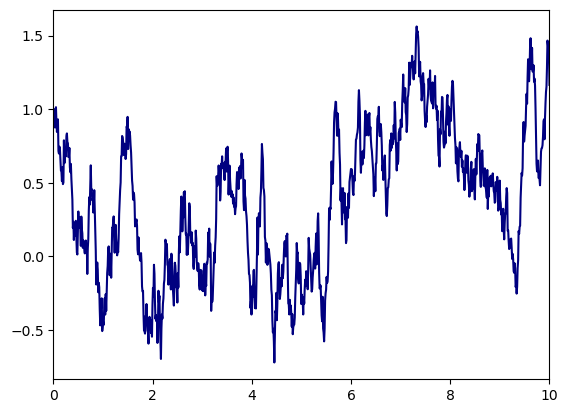

In [85]:
def subordinator(alpha, N, s_delta, t_delta):
    """
    Subordinator

    :param alpha: stability indicy
    :param N: number of steps
    :param s_delta: change in s
    :param t_delta: change in t

    :return: Euler scheme for x(s) and t(s)
    """
    x_euler = np.zeros(100000000)
    t_euler = np.zeros(100000000)

    x_euler[0] = 1
    t_euler[0] = 0  # U(0)

    s = 0
    t = 0

    c1 = np.pi / 2

    for j in range(1, N - 1):
        t_j = j * t_delta

        while t_euler[s] < t_j:
            ###################################################################### Calculate random tau (noise)
            W = np.random.exponential(1)
            V = np.random.uniform(-np.pi / 2, +np.pi / 2)

            tau_delta_s = (
                s_delta ** (1 / alpha)
                * (np.sin(alpha * (V + c1)) / (np.cos(V) ** (1 / alpha)))
                * (((np.cos(V - alpha * (V + c1))) / W) ** ((1 - alpha) / alpha))
            )

            ###################################################################### t(s)
            t_euler[s + 1] = t_euler[s] + tau_delta_s

            ###################################################################### x(t)

            F = -x_euler[s]
            x_euler[s + 1] = (
                x_euler[s] + s_delta * F + np.random.normal(scale=s_delta ** (1 / 2))
            )

            s = s + 1

        x_euler[t] = x_euler[s]
        t_euler[t] = t_euler[s - 1]  # save the time before, not s
        t = t + 1

    return x_euler, t_euler


# Set parameters for process
al = 1.0  # stability indicy
N = 1000  # number of steps
T = 10  # total time
dt = T / N  # size of change in t, dt
st = 0.0001  # size of change in s, ds; has to be smaller than dt
# Calculate the process
x_euler, t_euler = subordinator(alpha=al, N=N, s_delta=st, t_delta=dt)
time = np.linspace(0, T, N - 2)


plt.plot(time, x_euler[0 : N - 2], "navy")
plt.xlim(0, T)
plt.show()
